In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import ast
from matplotlib.lines import Line2D
import matplotlib.lines as mlines

import matplotlib.pyplot as plt
# Set font sizes for all text elements in the plot
plt.rcParams.update({
    'font.size': 8,          # Default font size
    'axes.titlesize': 10,    # Title font size
    'axes.labelsize': 9,     # Axis labels font size
    'xtick.labelsize': 8,    # X-axis tick labels font size
    'ytick.labelsize': 8,    # Y-axis tick labels font size
    'legend.fontsize': 8,    # Legend font size
    'figure.titlesize': 10   # Figure title font size
})
plt.rcParams['font.family'] = 'sans-serif'


dCaAP_color = plt.get_cmap('Pastel2')(0)
dCaAP_error_color = plt.get_cmap('Set2')(0)
NMDA_color = plt.get_cmap('Pastel2')(1)
NMDA_error_color = plt.get_cmap('Set2')(1)

dCaAP_color2 = plt.get_cmap('tab20c')(18)
dCaAP_error_color2 = plt.get_cmap('tab20c')(17)


thr_color = plt.get_cmap('Pastel2')(2)
thr_error_color = plt.get_cmap('Set2')(2)
grade_color = plt.get_cmap('Pastel2')(3)
grade_error_color = plt.get_cmap('Set2')(3)
ref_color=plt.get_cmap('Pastel2')(4)
ref_error_color=plt.get_cmap('Set2')(4)
amp_color=plt.get_cmap('Pastel2')(5)
amp_error_color=plt.get_cmap('Set2')(5)

dCaAP_legend = mlines.Line2D([], [], color=dCaAP_color, marker='s', linestyle='None',
                           label='dCaAP')
dCaAP_legend2 = mlines.Line2D([], [], color=dCaAP_color2, marker='s', linestyle='None',
                           label='dCaAP')
NMDA_legend = mlines.Line2D([], [], color=NMDA_color, marker='s', linestyle='None',
                           label='NMDA')
thr_legend = mlines.Line2D([], [], color=thr_color, marker='s', linestyle='None',
                           label='dCaAP: lower d-spike threshold')
grade_legend = mlines.Line2D([], [], color=grade_color, marker='s', linestyle='None',
                           label='dCaAP: not graded response')
ref_legend = mlines.Line2D([], [], color=ref_color, marker='s', linestyle='None',
                           label='dCaAP: shorter refractory time')
amp_legend = mlines.Line2D([], [], color=amp_color, marker='s', linestyle='None',
                           label='dCaAP: lower spike amplitude')

## Random_Input

In [12]:
EXP2_dend =[]
EXP2_dend_err=[]
EXP2_assemb = []
EXP2_assemb_err=[]
EXP2_eff =[]
EXP2_eff_err=[]
#################################################
exp_name = "rewiring_ex2"
exp_result_name_folder = 'Random_input'

    
for model_name in ['Limbacher','Gidon_dend']:


        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
            
        if '.DS_Store' in simulation_list_date:
            simulation_list_date.remove('.DS_Store')   
            
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 26:
                        line_as_list = ast.literal_eval(line[29:])
#                         print(line_as_list)
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        
        EXP2_dend.append(np.mean(sep_dend))
        EXP2_dend_err.append(np.std(sep_dend))
        EXP2_assemb.append(np.mean(sep_ass))
        EXP2_assemb_err.append(np.std(sep_ass))
        EXP2_eff.append(np.mean(eff))
        EXP2_eff_err.append(np.std(eff))

In [19]:
print(EXP3_dend, EXP3_dend_err)
print(EXP3_assemb, EXP3_assemb_err)
print(EXP3_eff, EXP3_eff_err)

[3.5, 7.0] [1.6278820596099706, 1.0954451150103321]
[1.7, 5.1] [0.6403124237432849, 0.7000000000000001]
[11.541666666666668, 48.144841269841265] [4.71422934670486, 13.58902846192202]


## Results of the dCaAP model with lower dendritic spike threshold

In [3]:
thr_EXP2_dend =[]
thr_EXP2_dend_err=[]
thr_EXP2_assemb = []
thr_EXP2_assemb_err=[]
thr_EXP2_eff =[]
thr_EXP2_eff_err=[]
#################################################
exp_name = "rewiring_ex2"
exp_result_name_folder = 'Random_input_d_thr'
for model_name in ['Gidon_dend']:
    

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
            
        if '.DS_Store' in simulation_list_date:
            simulation_list_date.remove('.DS_Store')   
            
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 26:
                        line_as_list = ast.literal_eval(line[29:])
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        
        thr_EXP2_dend.append(np.mean(sep_dend))
        thr_EXP2_dend_err.append(np.std(sep_dend))
        thr_EXP2_assemb.append(np.mean(sep_ass))
        thr_EXP2_assemb_err.append(np.std(sep_ass))
        thr_EXP2_eff.append(np.mean(eff))
        thr_EXP2_eff_err.append(np.std(eff))

## Results of the dCaAP model with constant dendritic spike amplitude (not graded)

In [4]:
grade_EXP2_dend =[]
grade_EXP2_dend_err=[]
grade_EXP2_assemb = []
grade_EXP2_assemb_err=[]
grade_EXP2_eff =[]
grade_EXP2_eff_err=[]
#################################################
exp_name = "rewiring_ex2"
exp_result_name_folder = 'Random_input_not_graded'
for model_name in ['Gidon_dend']:
    

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
            
        if '.DS_Store' in simulation_list_date:
            simulation_list_date.remove('.DS_Store')   
            
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 26:
                        line_as_list = ast.literal_eval(line[29:])
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        
        grade_EXP2_dend.append(np.mean(sep_dend))
        grade_EXP2_dend_err.append(np.std(sep_dend))
        grade_EXP2_assemb.append(np.mean(sep_ass))
        grade_EXP2_assemb_err.append(np.std(sep_ass))
        grade_EXP2_eff.append(np.mean(eff))
        grade_EXP2_eff_err.append(np.std(eff))

## Results of the dCaAP model with shorter dendritic refractory time

In [5]:
ref_EXP2_dend =[]
ref_EXP2_dend_err=[]
ref_EXP2_assemb = []
ref_EXP2_assemb_err=[]
ref_EXP2_eff =[]
ref_EXP2_eff_err=[]
#################################################
exp_name = "rewiring_ex2"
exp_result_name_folder = 'Random_input_ref'
for model_name in ['Gidon_dend']:
    

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
            
        if '.DS_Store' in simulation_list_date:
            simulation_list_date.remove('.DS_Store')   
            
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 26:
                        line_as_list = ast.literal_eval(line[29:])
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        
        ref_EXP2_dend.append(np.mean(sep_dend))
        ref_EXP2_dend_err.append(np.std(sep_dend))
        ref_EXP2_assemb.append(np.mean(sep_ass))
        ref_EXP2_assemb_err.append(np.std(sep_ass))
        ref_EXP2_eff.append(np.mean(eff))
        ref_EXP2_eff_err.append(np.std(eff))

## Results of the dCaAP model with lower dendritic spike amplitude

In [6]:
amp_EXP2_dend =[]
amp_EXP2_dend_err=[]
amp_EXP2_assemb = []
amp_EXP2_assemb_err=[]
amp_EXP2_eff =[]
amp_EXP2_eff_err=[]
#################################################
exp_name = "rewiring_ex2"
exp_result_name_folder = 'Random_input_amp'
for model_name in ['Gidon_dend']:
    

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
            
        if '.DS_Store' in simulation_list_date:
            simulation_list_date.remove('.DS_Store')   
            
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 26:
                        line_as_list = ast.literal_eval(line[29:])
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        
        amp_EXP2_dend.append(np.mean(sep_dend))
        amp_EXP2_dend_err.append(np.std(sep_dend))
        amp_EXP2_assemb.append(np.mean(sep_ass))
        amp_EXP2_assemb_err.append(np.std(sep_ass))
        amp_EXP2_eff.append(np.mean(eff))
        amp_EXP2_eff_err.append(np.std(eff))

/var/folders/rj/mk57hg8s74l0y1xwws2ss9k40000gn/T/ipykernel_67311/702526623.py:44: RuntimeWarning: invalid value encountered in divide
  eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)


# Sequential_Input

In [7]:
EXP3_dend =[]
EXP3_dend_err=[]
EXP3_assemb = []
EXP3_assemb_err=[]
EXP3_eff =[]
EXP3_eff_err=[]
#################################################
exp_name = "rewiring_ex3"
exp_result_name_folder = 'Sequential_input'
for model_name in ['Limbacher','Gidon_dend']:

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 26:
                        line_as_list = ast.literal_eval(line[29:])
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        sep_ass = sep_ass[:len(sep_dend)]
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        
        EXP3_dend.append(np.mean(sep_dend))
        EXP3_dend_err.append(np.std(sep_dend))
        EXP3_assemb.append(np.mean(sep_ass))
        EXP3_assemb_err.append(np.std(sep_ass))
        EXP3_eff.append(np.mean(eff))
        EXP3_eff_err.append(np.std(eff))

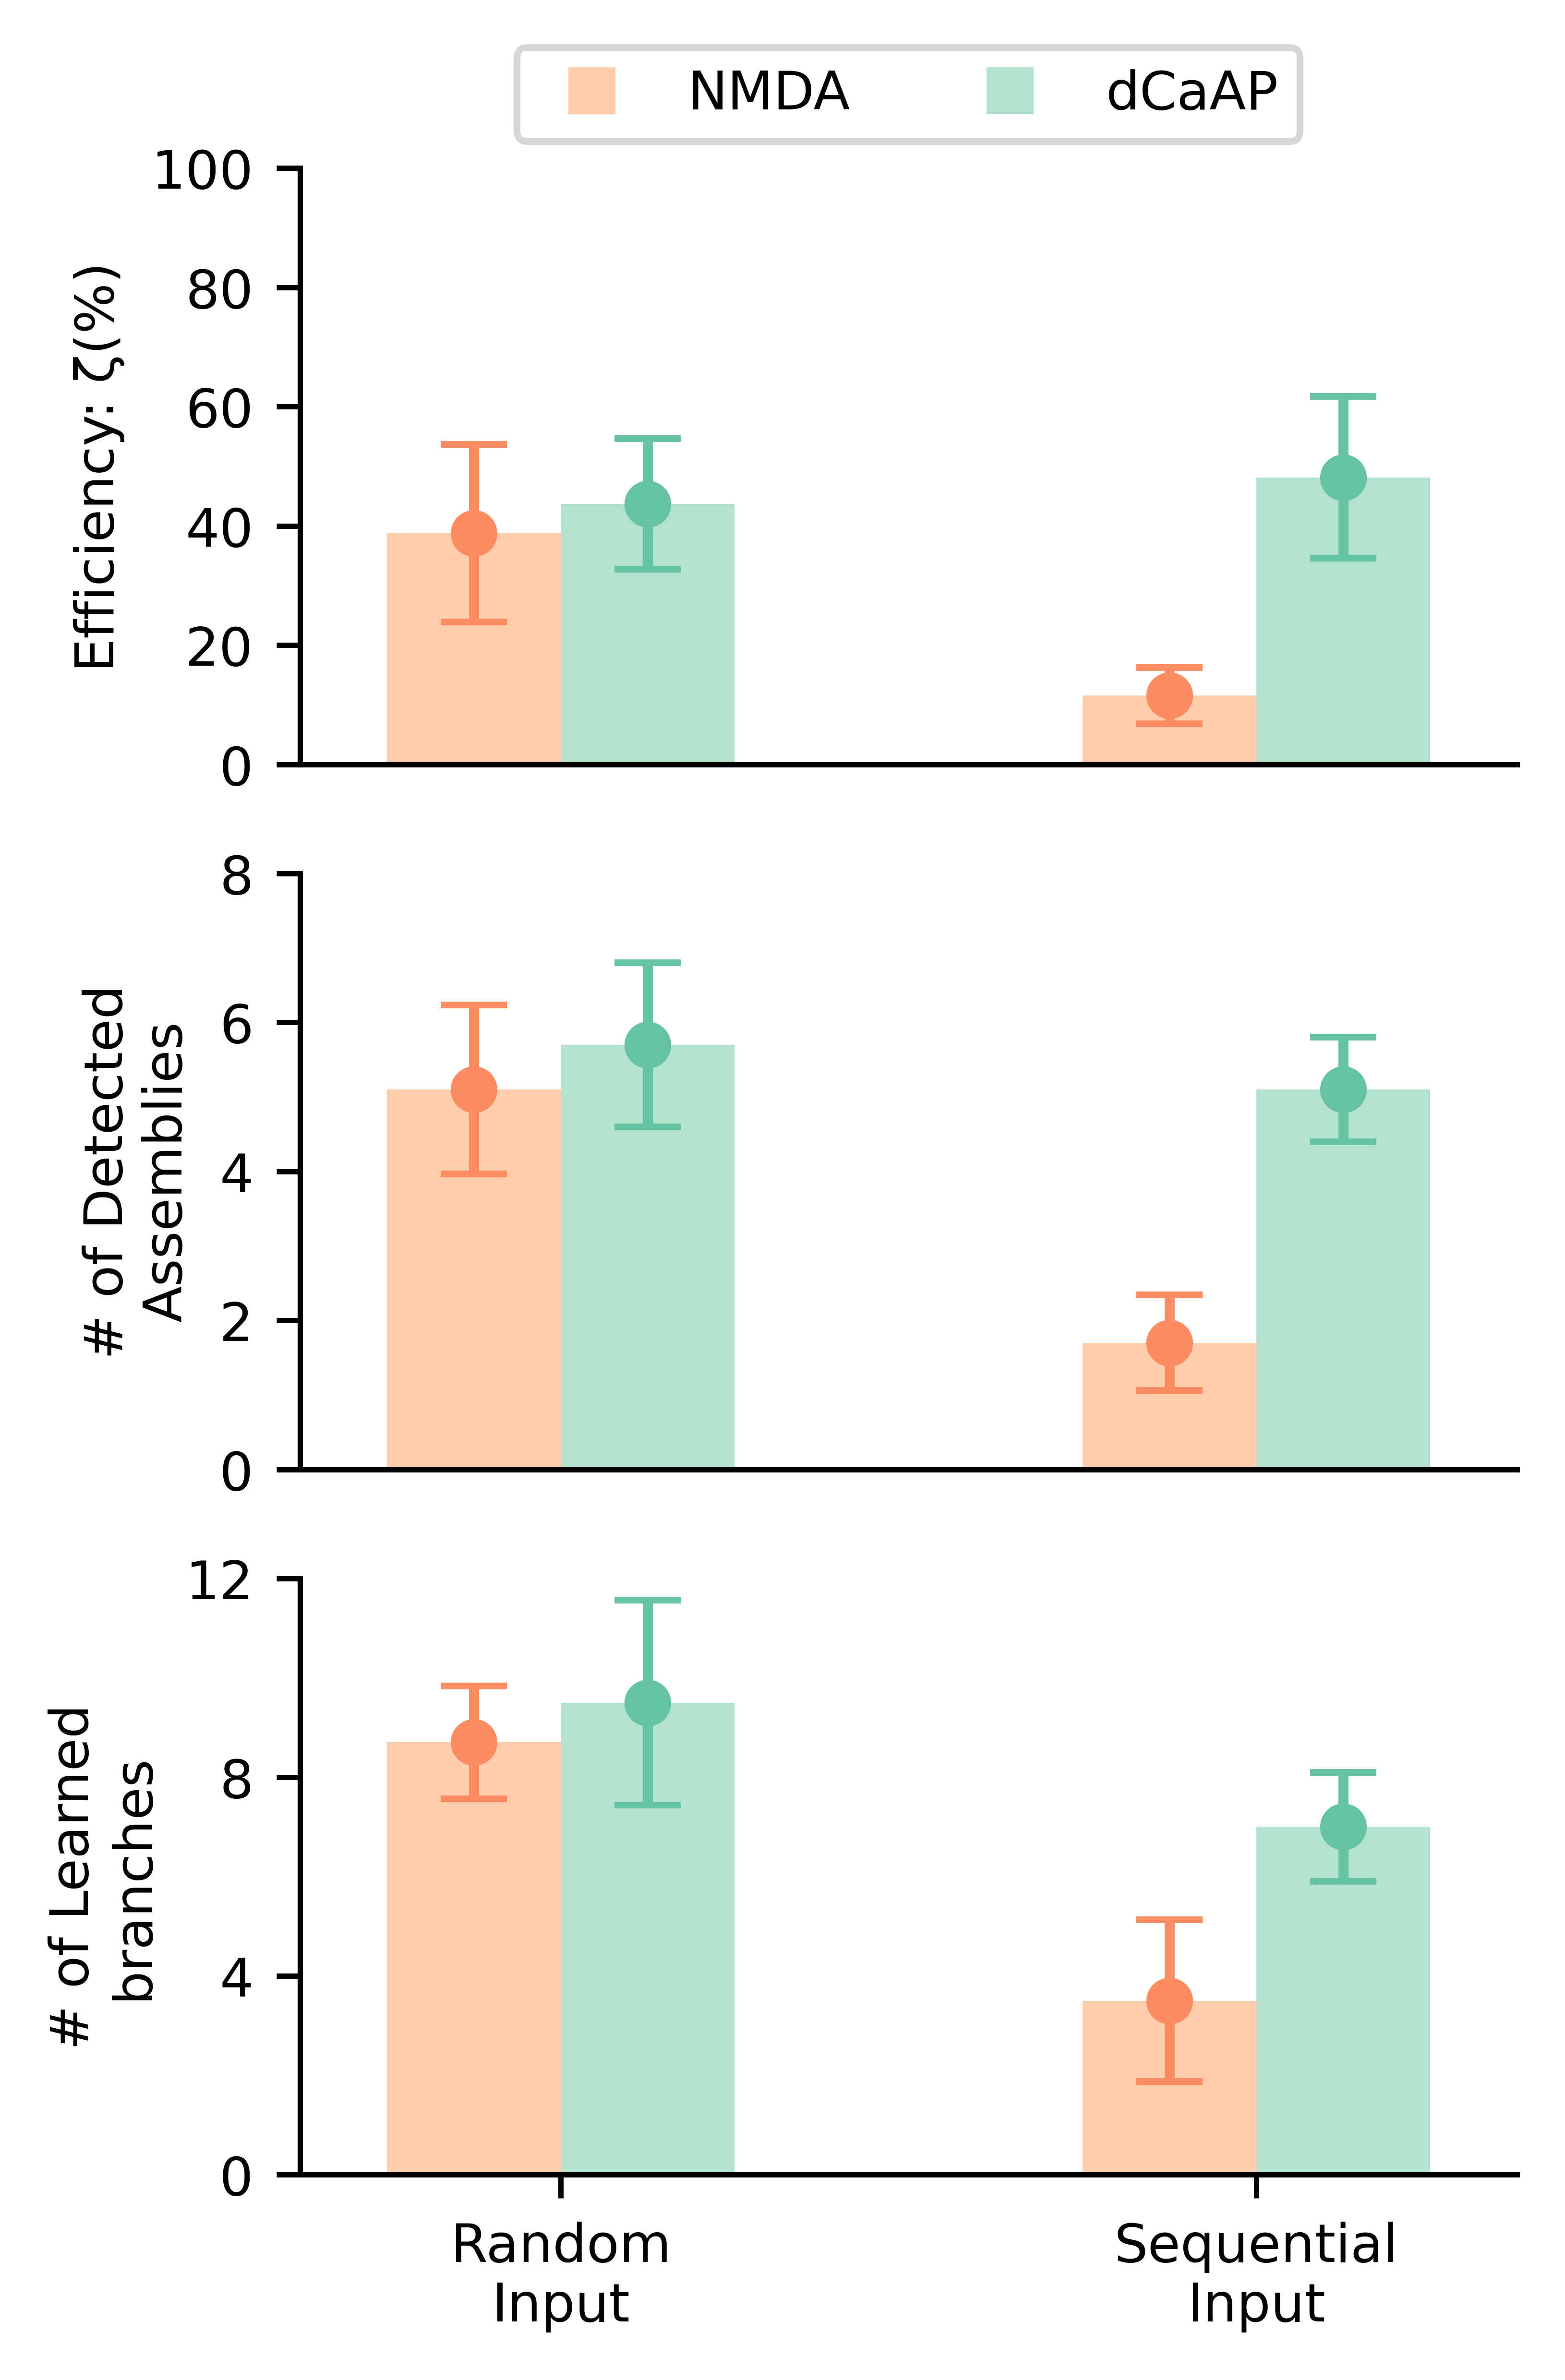

In [8]:
fig, ax = plt.subplots(3,1,figsize=(3.3, 5.0), dpi=1000)
x_pos =[[0.8,0.9],[1.2,1.3]]
x_lim = (0.7,1.4)
w = 0.1

#### bottom
ax[2].bar(x_pos[0][0], EXP2_dend[0],width = w,color = NMDA_color,label="NMDA")
ax[2].errorbar(x_pos[0][0], EXP2_dend[0], yerr=EXP2_assemb_err[0], fmt='o', color=NMDA_error_color, ecolor=NMDA_error_color, capsize=5, label="NMDA")

ax[2].bar(x_pos[0][1], EXP2_dend[1],width = w,color = dCaAP_color,label="dCaAP")
ax[2].errorbar(x_pos[0][1], EXP2_dend[1], yerr=EXP2_dend_err[1], fmt='o', color=dCaAP_error_color, ecolor=dCaAP_error_color, capsize=5, label="dCaAP")


ax[2].bar(x_pos[1][0], EXP3_dend[0],width = w,color = NMDA_color,label="NMDA")
ax[2].errorbar(x_pos[1][0], EXP3_dend[0], yerr=EXP3_dend_err[0], fmt='o', color=NMDA_error_color, ecolor=NMDA_error_color, capsize=5, label="NMDA")

ax[2].bar(x_pos[1][1], EXP3_dend[1],width = w,color = dCaAP_color,label="dCaAP")
ax[2].errorbar(x_pos[1][1], EXP3_dend[1], yerr=EXP3_dend_err[1], fmt='o', color=dCaAP_error_color, ecolor=dCaAP_error_color, capsize=5, label="dCaAP")


ax[2].set_xlim(x_lim)
ax[2].set_ylim(0,12)
ax[2].set_xticks([np.mean(x_pos[0]),np.mean(x_pos[1])],['Random\nInput' ,'Sequential\nInput'])
ax[2].set_yticks(np.arange(0,13,4))
ax[2].set_ylabel('# of Learned\nbranches')
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

#### middle

ax[1].bar(x_pos[0][0], EXP2_assemb[0],width = w,color = NMDA_color,label="NMDA")
ax[1].errorbar(x_pos[0][0], EXP2_assemb[0], yerr=EXP2_assemb_err[0], fmt='o', color=NMDA_error_color, ecolor=NMDA_error_color, capsize=5, label="NMDA")

ax[1].bar(x_pos[0][1], EXP2_assemb[1],width = w,color = dCaAP_color,label="dCaAP")
ax[1].errorbar(x_pos[0][1], EXP2_assemb[1], yerr=EXP2_assemb_err[1], fmt='o', color=dCaAP_error_color, ecolor=dCaAP_error_color, capsize=5, label="dCaAP")


ax[1].bar(x_pos[1][0], EXP3_assemb[0],width = w,color = NMDA_color,label="NMDA")
ax[1].errorbar(x_pos[1][0], EXP3_assemb[0], yerr=EXP3_assemb_err[0], fmt='o', color=NMDA_error_color, ecolor=NMDA_error_color, capsize=5, label="NMDA")

ax[1].bar(x_pos[1][1], EXP3_assemb[1],width = w,color = dCaAP_color,label="dCaAP")
ax[1].errorbar(x_pos[1][1], EXP3_assemb[1], yerr=EXP3_assemb_err[1], fmt='o', color=dCaAP_error_color, ecolor=dCaAP_error_color, capsize=5, label="dCaAP")


ax[1].set_xlim(x_lim)
ax[1].set_ylim(0,8)
ax[1].set_xticks([])
ax[1].set_ylabel('# of Detected\nAssemblies')
ax[1].spines['top'].set_visible(False)
# ax[1].spines['bottom'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# #### top

ax[0].bar(x_pos[0][0], EXP2_eff[0],width = w,color = NMDA_color,label="NMDA")
ax[0].errorbar(x_pos[0][0], EXP2_eff[0], yerr=EXP2_eff_err[0], fmt='o', color=NMDA_error_color, ecolor=NMDA_error_color, capsize=5, label="NMDA")

ax[0].bar(x_pos[0][1], EXP2_eff[1],width = w,color = dCaAP_color,label="dCaAP")
ax[0].errorbar(x_pos[0][1], EXP2_eff[1], yerr=EXP2_eff_err[1], fmt='o', color=dCaAP_error_color, ecolor=dCaAP_error_color, capsize=5, label="dCaAP")


ax[0].bar(x_pos[1][0], EXP3_eff[0],width = w,color = NMDA_color,label="NMDA")
ax[0].errorbar(x_pos[1][0], EXP3_eff[0], yerr=EXP3_eff_err[0], fmt='o', color=NMDA_error_color, ecolor=NMDA_error_color, capsize=5, label="NMDA")

ax[0].bar(x_pos[1][1], EXP3_eff[1],width = w,color = dCaAP_color,label="dCaAP")
ax[0].errorbar(x_pos[1][1], EXP3_eff[1], yerr=EXP3_eff_err[1], fmt='o', color=dCaAP_error_color, ecolor=dCaAP_error_color, capsize=5, label="dCaAP")


ax[0].set_xlim(x_lim)
ax[0].set_ylim(0,100)
ax[0].set_xticks([])
ax[0].set_ylabel('Efficiency: \u03B6(%)')
ax[0].spines['top'].set_visible(False)
# ax[0].spines['bottom'].set_visible(False)
ax[0].spines['right'].set_visible(False)



ax[0].legend(handles=[NMDA_legend,dCaAP_legend],loc='lower center',bbox_to_anchor = (0.5,1), ncol = 2)
plt.tight_layout()

fig.savefig("Figures/pdf/Random_Sequential.pdf", format='pdf',bbox_inches='tight')
fig.savefig("Figures/svg/Random_Sequential.svg", format='svg',bbox_inches='tight')

## Results of the dCaAP model with constant dendritic spike amplitude (not graded)

In [200]:
grade_EXP3_dend =[]
grade_EXP3_dend_err=[]
grade_EXP3_assemb = []
grade_EXP3_assemb_err=[]
grade_EXP3_eff =[]
grade_EXP3_eff_err=[]
#################################################
exp_name = "rewiring_ex3"
exp_result_name_folder = 'Sequential_input_not_graded'
for model_name in ['Gidon_dend']:

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 26:
                        line_as_list = ast.literal_eval(line[29:])
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        sep_ass = sep_ass[:len(sep_dend)]
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        
        grade_EXP3_dend.append(np.mean(sep_dend))
        grade_EXP3_dend_err.append(np.std(sep_dend))
        grade_EXP3_assemb.append(np.mean(sep_ass))
        grade_EXP3_assemb_err.append(np.std(sep_ass))
        grade_EXP3_eff.append(np.mean(eff))
        grade_EXP3_eff_err.append(np.std(eff))

## Results of the dCaAP model with lower Dendritic Threshold V_thr = -36 --> -55 mv

In [201]:
thr_EXP3_dend =[]
thr_EXP3_dend_err=[]
thr_EXP3_assemb = []
thr_EXP3_assemb_err=[]
thr_EXP3_eff =[]
thr_EXP3_eff_err=[]
#################################################
exp_name = "rewiring_ex3"
exp_result_name_folder = 'Sequential_input_d_thr'
for model_name in ['Gidon_dend']:

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 26:
                        line_as_list = ast.literal_eval(line[29:])
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        sep_ass = sep_ass[:len(sep_dend)]
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        
        thr_EXP3_dend.append(np.mean(sep_dend))
        thr_EXP3_dend_err.append(np.std(sep_dend))
        thr_EXP3_assemb.append(np.mean(sep_ass))
        thr_EXP3_assemb_err.append(np.std(sep_ass))
        thr_EXP3_eff.append(np.mean(eff))
        thr_EXP3_eff_err.append(np.std(eff))

## Results of the dCaAP model with shorter dendritic refractory time

In [202]:
ref_EXP3_dend =[]
ref_EXP3_dend_err=[]
ref_EXP3_assemb = []
ref_EXP3_assemb_err=[]
ref_EXP3_eff =[]
ref_EXP3_eff_err=[]
#################################################
exp_name = "rewiring_ex3"
exp_result_name_folder = 'Sequential_input_ref'
for model_name in ['Gidon_dend']:

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 26:
                        line_as_list = ast.literal_eval(line[29:])
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        sep_ass = sep_ass[:len(sep_dend)]
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        
        ref_EXP3_dend.append(np.mean(sep_dend))
        ref_EXP3_dend_err.append(np.std(sep_dend))
        ref_EXP3_assemb.append(np.mean(sep_ass))
        ref_EXP3_assemb_err.append(np.std(sep_ass))
        ref_EXP3_eff.append(np.mean(eff))
        ref_EXP3_eff_err.append(np.std(eff))

## Results of the dCaAP model with lower dendritic spike amplitude

In [203]:
amp_EXP3_dend =[]
amp_EXP3_dend_err=[]
amp_EXP3_assemb = []
amp_EXP3_assemb_err=[]
amp_EXP3_eff =[]
amp_EXP3_eff_err=[]
#################################################
exp_name = "rewiring_ex3"
exp_result_name_folder = 'Sequential_input_amp'
for model_name in ['Gidon_dend']:

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 26:
                        line_as_list = ast.literal_eval(line[29:])
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        sep_ass = sep_ass[:len(sep_dend)]
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        
        amp_EXP3_dend.append(np.mean(sep_dend))
        amp_EXP3_dend_err.append(np.std(sep_dend))
        amp_EXP3_assemb.append(np.mean(sep_ass))
        amp_EXP3_assemb_err.append(np.std(sep_ass))
        amp_EXP3_eff.append(np.mean(eff))
        amp_EXP3_eff_err.append(np.std(eff))

/var/folders/rj/mk57hg8s74l0y1xwws2ss9k40000gn/T/ipykernel_28088/1361824554.py:40: RuntimeWarning: invalid value encountered in divide
  eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)


## plot the results of "not graded" and "lower dendritic threshold"

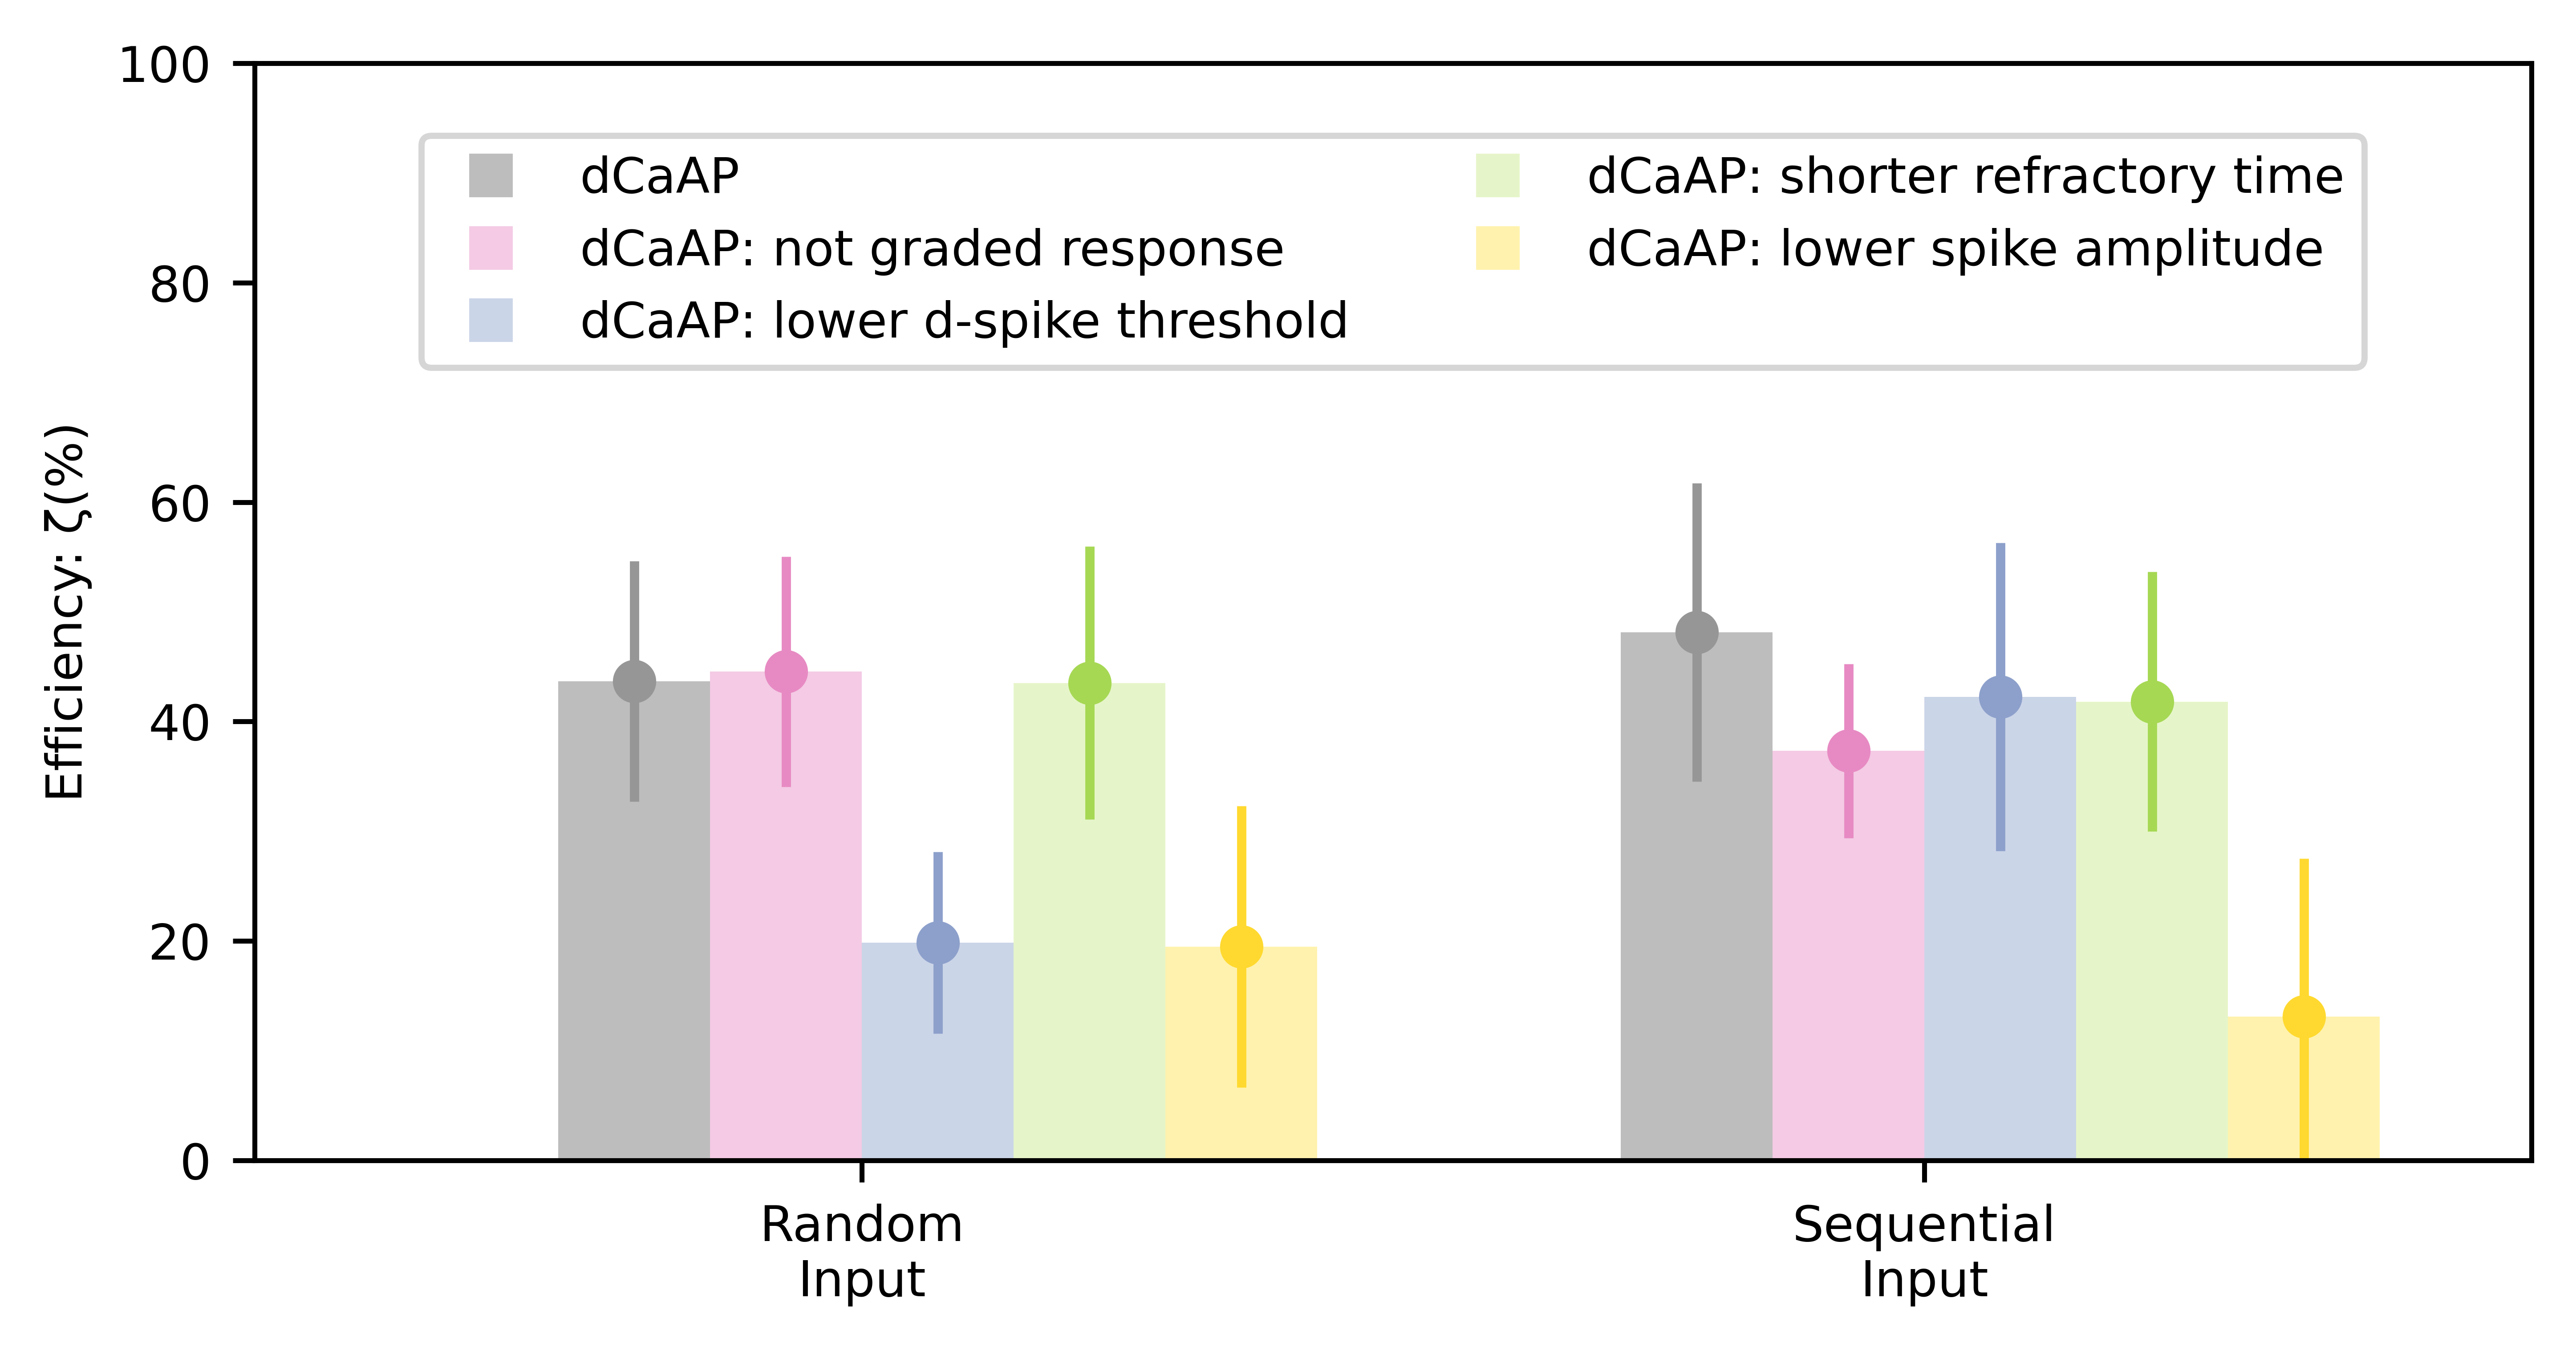

In [204]:
fig, ax = plt.subplots(figsize=(6.6, 3.2), dpi=1000)
x_pos =[[0.8,0.9,1.0,1.1,1.2,1.3],[1.5,1.6,1.7,1.8,1.9,2.0]]
w =0.1


# ax.bar(x_pos[0][0],EXP2_eff[0],width = w,color = NMDA_color,label = 'NMDA')
# ax.errorbar(x_pos[0][0],EXP2_eff[0],yerr=EXP2_eff_err[0],fmt='o',color = NMDA_error_color,label = 'NMDA')

ax.bar(x_pos[0][1],EXP2_eff[1],width = w,color = dCaAP_color2,label = 'dCaAP')
ax.errorbar(x_pos[0][1],EXP2_eff[1],yerr=EXP2_eff_err[1],fmt='o',color = dCaAP_error_color2,label = 'dCaAP')

ax.bar(x_pos[0][2],grade_EXP2_eff[0],width = w,color = grade_color,label = 'Not_graded')
ax.errorbar(x_pos[0][2],grade_EXP2_eff[0],yerr=grade_EXP2_eff_err[0],fmt='o',color = grade_error_color,label = 'Not_graded')

ax.bar(x_pos[0][3],thr_EXP2_eff[0],width = w,color = thr_color,label = 'Threshold')
ax.errorbar(x_pos[0][3],thr_EXP2_eff[0],yerr=thr_EXP2_eff_err[0],fmt='o',color = thr_error_color,label = 'Threshold')

ax.bar(x_pos[0][4],ref_EXP2_eff[0],width = w,color = ref_color,label = 'Refractory')
ax.errorbar(x_pos[0][4],ref_EXP2_eff[0],yerr=ref_EXP2_eff_err[0],fmt='o',color = ref_error_color,label = 'Refractory')

ax.bar(x_pos[0][5],amp_EXP2_eff[0],width = w,color = amp_color,label = 'Amplitude')
ax.errorbar(x_pos[0][5],amp_EXP2_eff[0],yerr=amp_EXP2_eff_err[0],fmt='o',color = amp_error_color,label = 'Amplitude')






# ax.bar(x_pos[1][0],EXP3_eff[0],width = w,color = NMDA_color,label = 'NMDA')
# ax.errorbar(x_pos[1][0],EXP3_eff[0],yerr=EXP3_eff_err[0],fmt='o',color = NMDA_error_color,label = 'NMDA')

ax.bar(x_pos[1][1],EXP3_eff[1],width = w,color = dCaAP_color2,label = 'dCaAP')
ax.errorbar(x_pos[1][1],EXP3_eff[1],yerr=EXP3_eff_err[1],fmt='o',color = dCaAP_error_color2,label = 'dCaAP')

ax.bar(x_pos[1][2],grade_EXP3_eff[0],width = w,color = grade_color,label = 'Not_graded')
ax.errorbar(x_pos[1][2],grade_EXP3_eff[0],yerr=grade_EXP3_eff_err[0],fmt='o',color = grade_error_color,label = 'Not_graded')

ax.bar(x_pos[1][3],thr_EXP3_eff[0],width = w,color = thr_color,label = 'Threshold')
ax.errorbar(x_pos[1][3],thr_EXP3_eff[0],yerr = thr_EXP3_eff_err[0],fmt='o',color = thr_error_color,label = 'Threshold')

ax.bar(x_pos[1][4],ref_EXP3_eff[0],width = w,color = ref_color,label = 'Refractory')
ax.errorbar(x_pos[1][4],ref_EXP3_eff[0],yerr = ref_EXP3_eff_err[0],fmt='o',color = ref_error_color,label = 'Refractory')

ax.bar(x_pos[1][5],amp_EXP3_eff[0],width = w,color = amp_color,label = 'Amplitude')
ax.errorbar(x_pos[1][5],amp_EXP3_eff[0],yerr = amp_EXP3_eff_err[0],fmt='o',color = amp_error_color,label = 'Amplitude')

# ax.legend()
ax.set_ylim(0,100)
ax.set_xlim(0.65,2.15)
ax.set_xticks([np.mean(x_pos[0]),np.mean(x_pos[1])],['Random\nInput','Sequential\nInput'])
ax.set_ylabel('Efficiency: \u03B6(%)')


ax.legend(handles=[dCaAP_legend2,grade_legend,thr_legend,ref_legend,amp_legend],loc='lower center',bbox_to_anchor = (0.5,0.7), ncol = 2)

fig.savefig("Figures/pdf/changed_random_sequential.pdf", format='pdf',bbox_inches='tight')
fig.savefig("Figures/svg/changed_random_sequential.svg", format='svg',bbox_inches='tight')

# Co-active Assemblies

In [205]:
EXP4_dend_limb =[EXP2_dend[0]]
EXP4_dend_limb_err=[EXP2_dend_err[0]]
EXP4_assemb_limb = [EXP2_assemb[0]]
EXP4_assemb_limb_err=[EXP2_assemb_err[0]]
EXP4_eff_limb =[EXP2_eff[0]]
EXP4_eff_limb_err=[EXP2_eff_err[0]]
#####################
EXP4_dend_gid =[EXP2_dend[1]]
EXP4_dend_gid_err=[EXP2_dend_err[1]]
EXP4_assemb_gid = [EXP2_assemb[1]]
EXP4_assemb_gid_err=[EXP2_assemb_err[1]]
EXP4_eff_gid =[EXP2_eff[1]]
EXP4_eff_gid_err=[EXP2_eff_err[1]]
#################################################
exp_name = "rewiring_ex4"
exp_result_name_folder_list = ['coactive2','coactive3','coactive4','coactive5','coactive6','coactive7','coactive8']

for model_name in ['Limbacher','Gidon_dend']:
    for exp_result_name_folder in exp_result_name_folder_list:

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
        if '.DS_Store' in simulation_list_date:
            simulation_list_date.remove('.DS_Store')
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 26:
                        line_as_list = ast.literal_eval(line[29:])
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        if model_name == "Limbacher":
            EXP4_dend_limb.append(np.mean(sep_dend))
            EXP4_dend_limb_err.append(np.std(sep_dend))
            EXP4_assemb_limb.append(np.mean(sep_ass))
            EXP4_assemb_limb_err.append(np.std(sep_ass))
            EXP4_eff_limb.append(np.mean(eff))
            EXP4_eff_limb_err.append(np.std(eff))
        elif model_name == "Gidon_dend":
            EXP4_dend_gid.append(np.mean(sep_dend))
            EXP4_dend_gid_err.append(np.std(sep_dend))
            EXP4_assemb_gid.append(np.mean(sep_ass))
            EXP4_assemb_gid_err.append(np.std(sep_ass))
            EXP4_eff_gid.append(np.mean(eff))
            EXP4_eff_gid_err.append(np.std(eff))

/var/folders/rj/mk57hg8s74l0y1xwws2ss9k40000gn/T/ipykernel_28088/2286198769.py:50: RuntimeWarning: invalid value encountered in divide
  eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)


## Number of Detected Assemblies

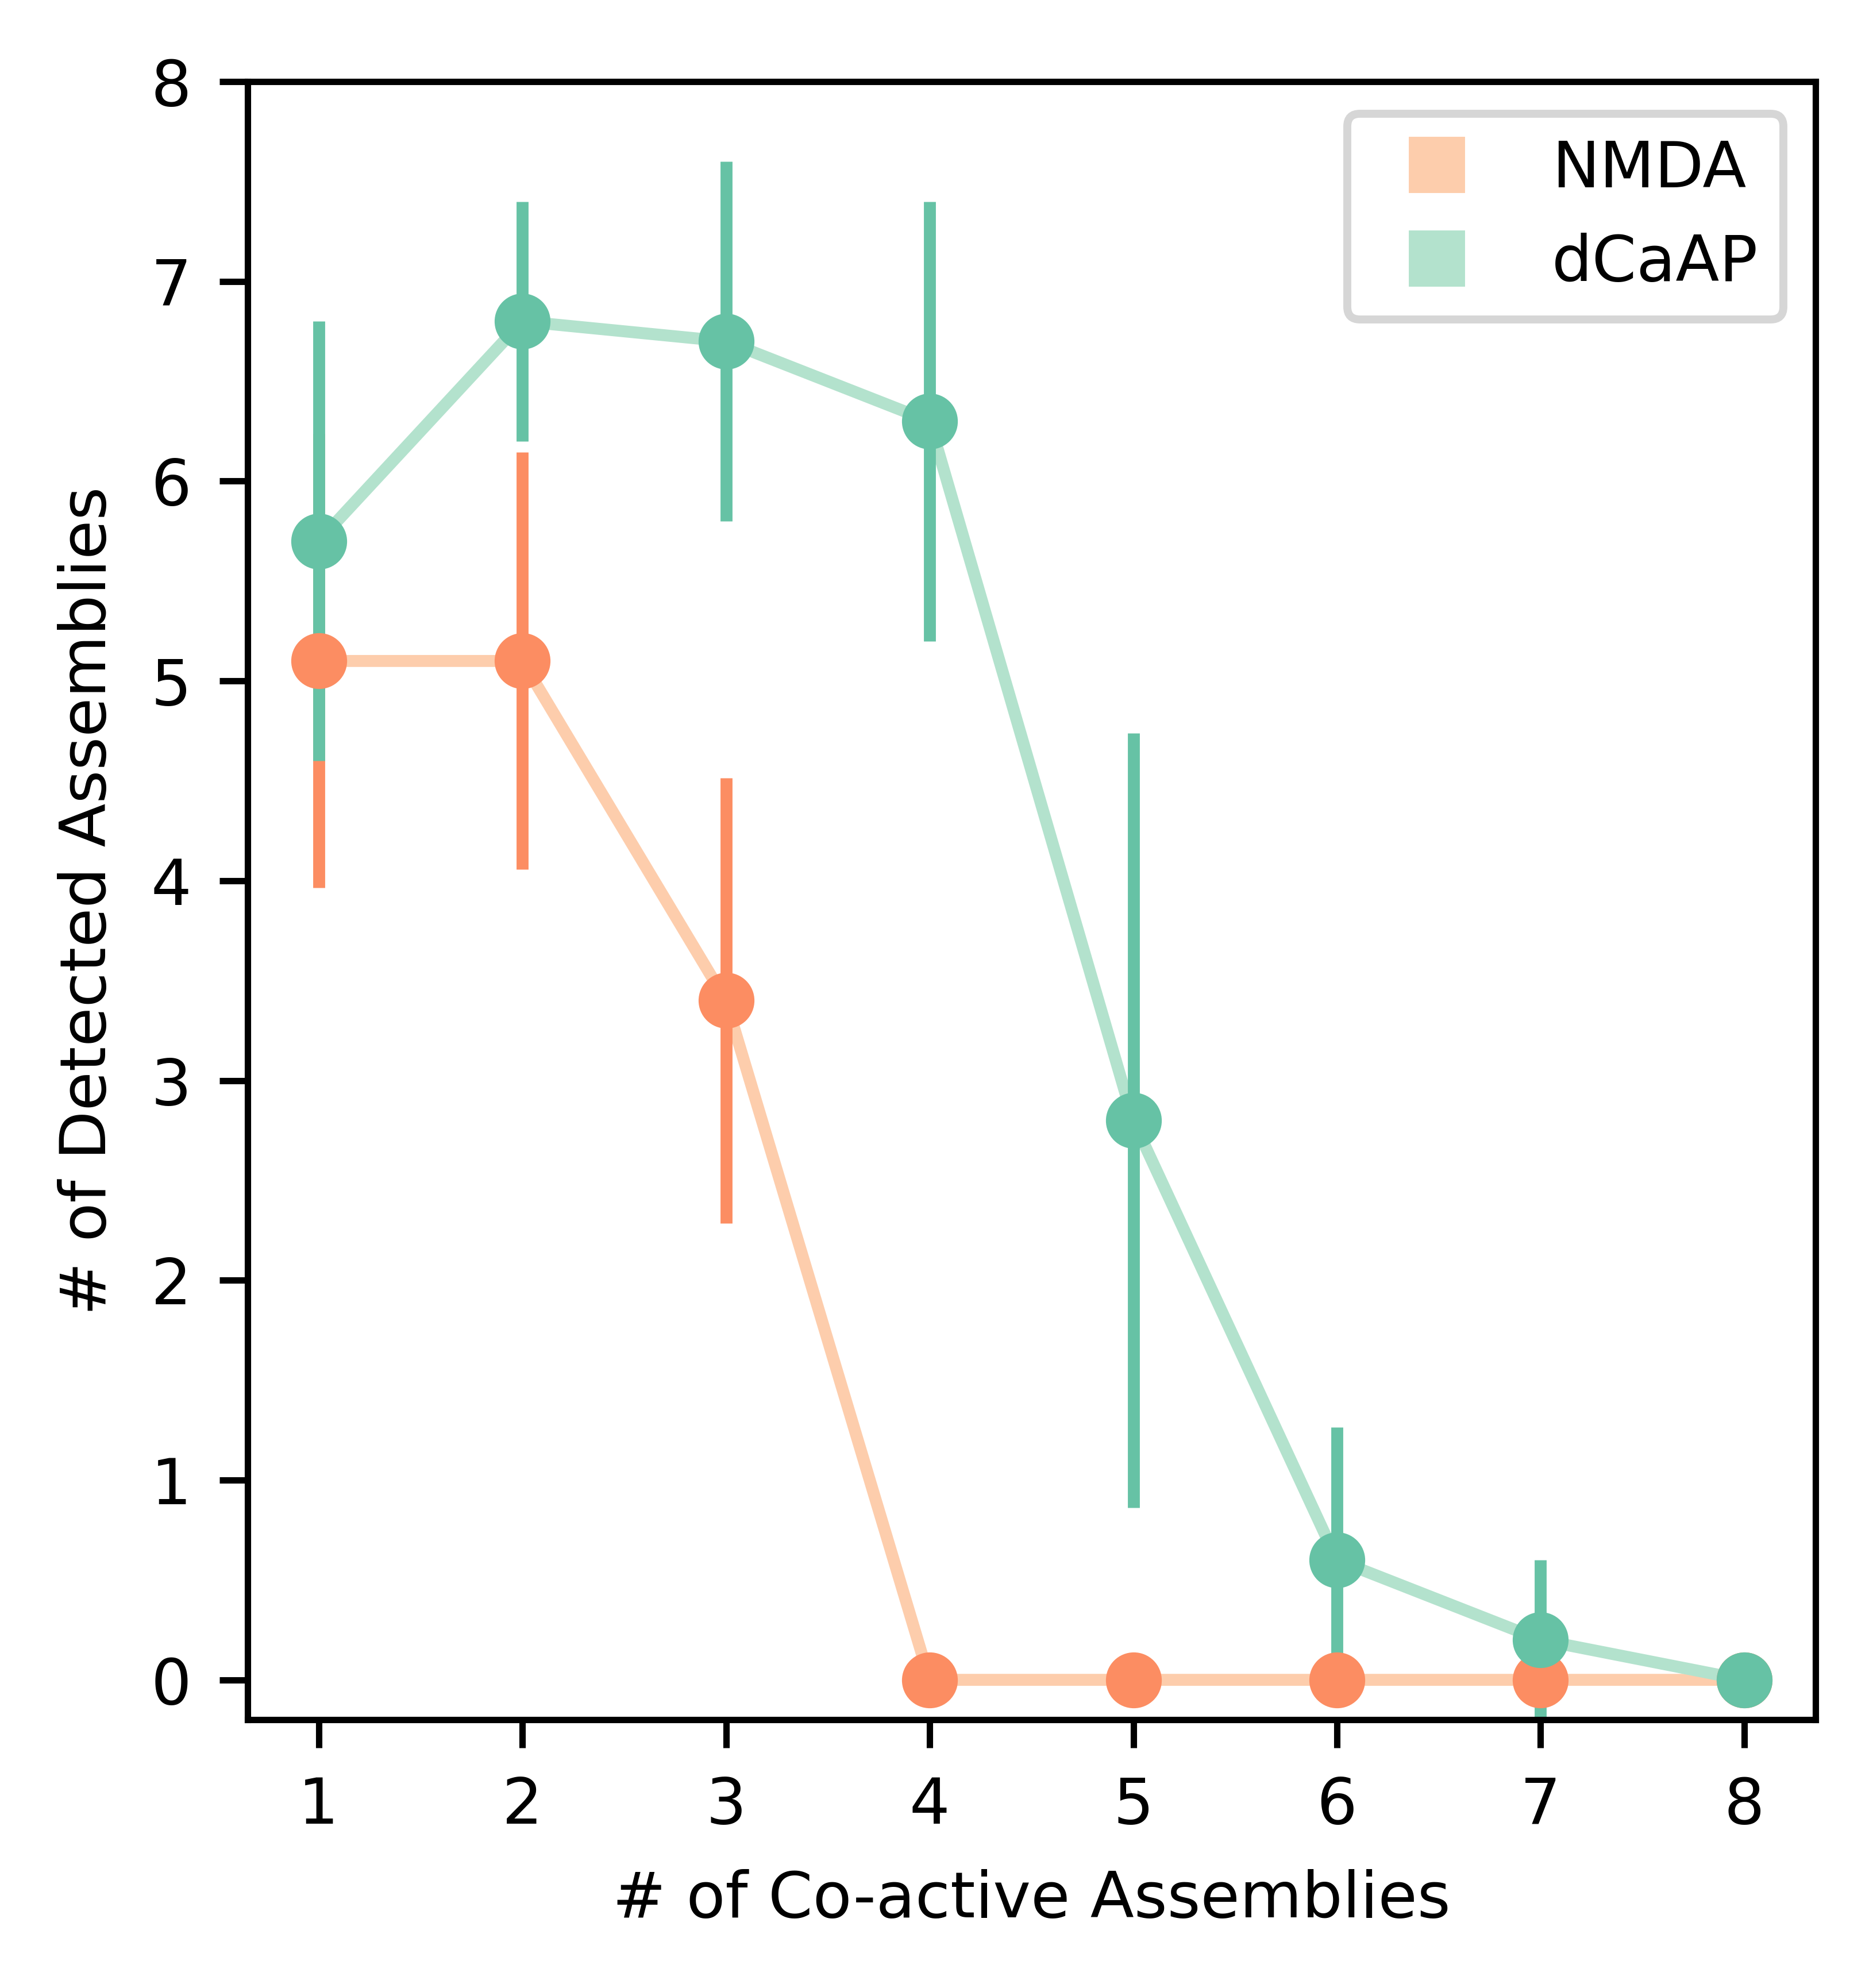

In [206]:
coactive = np.arange(1,9)

fig, ax = plt.subplots(figsize=(3.3, 3.5), dpi=1000)
ax.plot(coactive[0],EXP4_assemb_limb[0],color=NMDA_color,linestyle = '-',label="NMDA spike model" )
ax.plot(coactive[0],EXP4_assemb_gid[0],color=dCaAP_color,linestyle = '-',label="number of detected assemblies" )

ax.plot(coactive[:len(EXP4_dend_limb)],EXP4_assemb_limb,color=NMDA_color)
ax.errorbar(coactive[:len(EXP4_dend_limb)], EXP4_assemb_limb, yerr=EXP4_assemb_limb_err, fmt="o", color=NMDA_error_color)


ax.plot(coactive,EXP4_assemb_gid,color=dCaAP_color)
ax.errorbar(coactive, EXP4_assemb_gid, yerr=EXP4_assemb_gid_err, fmt="o", color=dCaAP_error_color)



#########
ax.set_xlabel("# of Co-active Assemblies")
plt.xticks(range(1,9))
plt.yticks()
ax.set_ylabel("# of Detected Assemblies")
plt.ylim(-0.2,8)



ax.legend(handles=[NMDA_legend,dCaAP_legend],loc='upper right')

plt.tight_layout()
# plt.show()
fig.savefig("Figures/pdf/coactive_detected_assemblies.pdf", format='pdf',bbox_inches='tight')
fig.savefig("Figures/svg/coactive_detected_assemblies.svg", format='svg',bbox_inches='tight')

## Efficiency

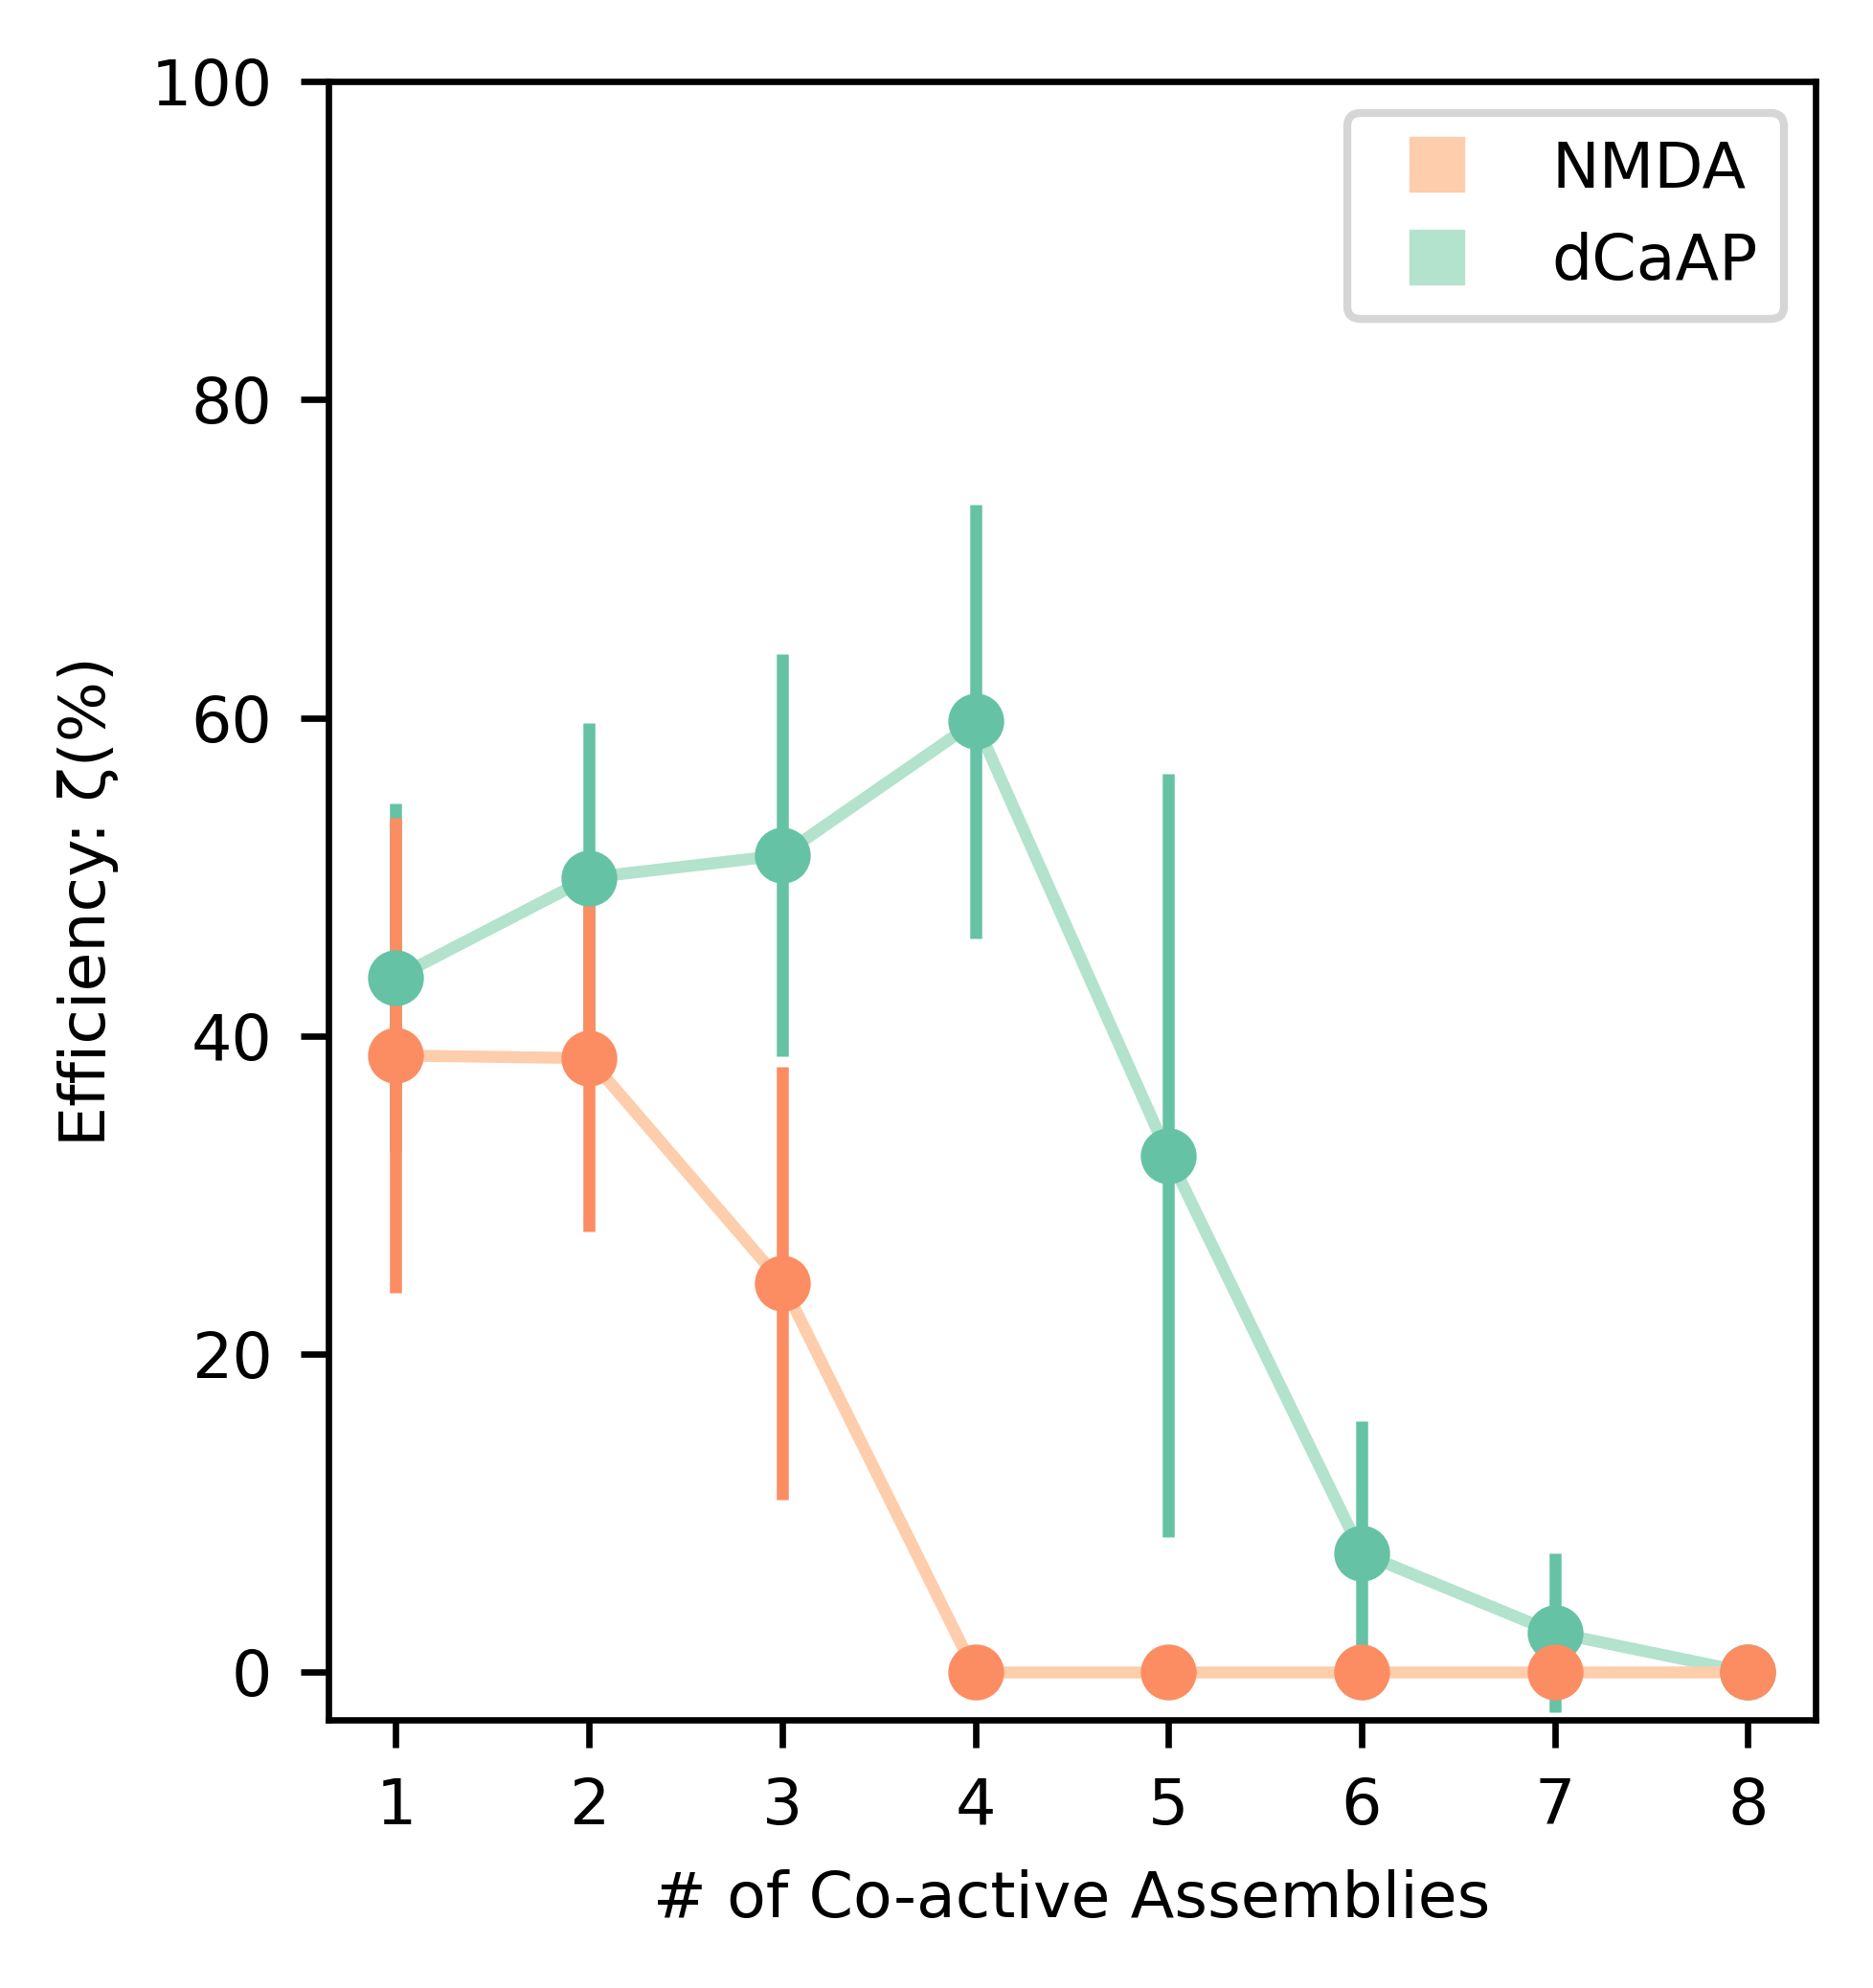

In [207]:
coactive = np.arange(1,9)


fig, ax = plt.subplots(figsize=(3.3, 3.5), dpi=600)
ax.set_ylim(-3,100)


ax.plot(coactive,EXP4_eff_gid,color=dCaAP_color,label="dCaAP")
ax.errorbar(coactive, EXP4_eff_gid, yerr=EXP4_eff_gid_err, fmt="o", color=dCaAP_error_color)

ax.plot(coactive,EXP4_eff_limb,color=NMDA_color,label="NMDA")
ax.errorbar(coactive, EXP4_eff_limb, yerr=EXP4_eff_limb_err, fmt="o", color=NMDA_error_color)


ax.set_ylabel("Efficiency: \u03B6(%)")

ax.set_xlabel("# of Co-active Assemblies")
plt.xticks(range(1,9))
plt.yticks()


ax.legend(handles=[NMDA_legend,dCaAP_legend],loc='upper right')

plt.tight_layout()
# plt.show()
fig.savefig("Figures/pdf/coactive_efficiencies.pdf", format='pdf',bbox_inches='tight')
fig.savefig("Figures/svg/coactive_efficiencies.svg", format='svg',bbox_inches='tight')

## Results of the dCaAP model with constant dendritic spike amplitude (not graded)

In [208]:
grade_EXP4_dend_gid =[grade_EXP2_dend[0]]
grade_EXP4_dend_gid_err=[grade_EXP2_dend_err[0]]
grade_EXP4_assemb_gid = [grade_EXP2_assemb[0]]
grade_EXP4_assemb_gid_err=[grade_EXP2_assemb_err[0]]
grade_EXP4_eff_gid =[grade_EXP2_eff[0]]
grade_EXP4_eff_gid_err=[grade_EXP2_eff_err[0]]
#################################################
exp_name = "rewiring_ex4"
exp_result_name_folder_list = ['not_graded_coactive2','not_graded_coactive3','not_graded_coactive4',
                               'not_graded_coactive5','not_graded_coactive6','not_graded_coactive7',
                               'not_graded_coactive8']

for model_name in ['Gidon_dend']:
    for exp_result_name_folder in exp_result_name_folder_list:

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
        if '.DS_Store' in simulation_list_date:
            simulation_list_date.remove('.DS_Store')
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 26:
                        line_as_list = ast.literal_eval(line[29:])
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        if model_name == "Gidon_dend":
            grade_EXP4_dend_gid.append(np.mean(sep_dend))
            grade_EXP4_dend_gid_err.append(np.std(sep_dend))
            grade_EXP4_assemb_gid.append(np.mean(sep_ass))
            grade_EXP4_assemb_gid_err.append(np.std(sep_ass))
            grade_EXP4_eff_gid.append(np.mean(eff))
            grade_EXP4_eff_gid_err.append(np.std(eff))

/var/folders/rj/mk57hg8s74l0y1xwws2ss9k40000gn/T/ipykernel_28088/4251915183.py:45: RuntimeWarning: invalid value encountered in divide
  eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)


## Results of the dCaAP model with lower Dendritic Threshold V_thr = -36 --> -55 mv

In [209]:
thr_EXP4_dend_gid =[thr_EXP2_dend[0]]
thr_EXP4_dend_gid_err=[thr_EXP2_dend_err[0]]
thr_EXP4_assemb_gid = [thr_EXP2_assemb[0]]
thr_EXP4_assemb_gid_err=[thr_EXP2_assemb_err[0]]
thr_EXP4_eff_gid =[thr_EXP2_eff[0]]
thr_EXP4_eff_gid_err=[thr_EXP2_eff_err[0]]
#################################################
exp_name = "rewiring_ex4"
exp_result_name_folder_list = ['d_thr_coactive2','d_thr_coactive3','d_thr_coactive4','d_thr_coactive5','d_thr_coactive6','d_thr_coactive7','d_thr_coactive8']

for model_name in ['Gidon_dend']:
    for exp_result_name_folder in exp_result_name_folder_list:

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
        if '.DS_Store' in simulation_list_date:
            simulation_list_date.remove('.DS_Store')
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 26:
                        line_as_list = ast.literal_eval(line[29:])
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        if model_name == "Limbacher":
            thr_EXP4_dend_limb.append(np.mean(sep_dend))
            thr_EXP4_dend_limb_err.append(np.std(sep_dend))
            thr_EXP4_assemb_limb.append(np.mean(sep_ass))
            thr_EXP4_assemb_limb_err.append(np.std(sep_ass))
            thr_EXP4_eff_limb.append(np.mean(eff))
            thr_EXP4_eff_limb_err.append(np.std(eff))
        elif model_name == "Gidon_dend":
            thr_EXP4_dend_gid.append(np.mean(sep_dend))
            thr_EXP4_dend_gid_err.append(np.std(sep_dend))
            thr_EXP4_assemb_gid.append(np.mean(sep_ass))
            thr_EXP4_assemb_gid_err.append(np.std(sep_ass))
            thr_EXP4_eff_gid.append(np.mean(eff))
            thr_EXP4_eff_gid_err.append(np.std(eff))

/var/folders/rj/mk57hg8s74l0y1xwws2ss9k40000gn/T/ipykernel_28088/2832342604.py:43: RuntimeWarning: invalid value encountered in divide
  eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)


## Results of the dCaAP model with shorter Dendritic refractory t_ref = 200 --> 50 ms

In [210]:
ref_EXP4_dend_gid =[ref_EXP2_dend[0]]
ref_EXP4_dend_gid_err=[ref_EXP2_dend_err[0]]
ref_EXP4_assemb_gid = [ref_EXP2_assemb[0]]
ref_EXP4_assemb_gid_err=[ref_EXP2_assemb_err[0]]
ref_EXP4_eff_gid =[ref_EXP2_eff[0]]
ref_EXP4_eff_gid_err=[ref_EXP2_eff_err[0]]
#################################################
exp_name = "rewiring_ex4"
exp_result_name_folder_list = ['ref_coactive2','ref_coactive3','ref_coactive4','ref_coactive5',
                               'ref_coactive6','ref_coactive7','ref_coactive8']

for model_name in ['Gidon_dend']:
    for exp_result_name_folder in exp_result_name_folder_list:

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
        if '.DS_Store' in simulation_list_date:
            simulation_list_date.remove('.DS_Store')
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 26:
                        line_as_list = ast.literal_eval(line[29:])
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        if model_name == "Limbacher":
            ref_EXP4_dend_limb.append(np.mean(sep_dend))
            ref_EXP4_dend_limb_err.append(np.std(sep_dend))
            ref_EXP4_assemb_limb.append(np.mean(sep_ass))
            ref_EXP4_assemb_limb_err.append(np.std(sep_ass))
            ref_EXP4_eff_limb.append(np.mean(eff))
            ref_EXP4_eff_limb_err.append(np.std(eff))
        elif model_name == "Gidon_dend":
            ref_EXP4_dend_gid.append(np.mean(sep_dend))
            ref_EXP4_dend_gid_err.append(np.std(sep_dend))
            ref_EXP4_assemb_gid.append(np.mean(sep_ass))
            ref_EXP4_assemb_gid_err.append(np.std(sep_ass))
            ref_EXP4_eff_gid.append(np.mean(eff))
            ref_EXP4_eff_gid_err.append(np.std(eff))

/var/folders/rj/mk57hg8s74l0y1xwws2ss9k40000gn/T/ipykernel_28088/3263032038.py:44: RuntimeWarning: invalid value encountered in divide
  eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)


## Results of the dCaAP model with lower Dendritic spike amplitude

In [211]:
amp_EXP4_dend_gid =[amp_EXP2_dend[0]]
amp_EXP4_dend_gid_err=[amp_EXP2_dend_err[0]]
amp_EXP4_assemb_gid = [amp_EXP2_assemb[0]]
amp_EXP4_assemb_gid_err=[amp_EXP2_assemb_err[0]]
amp_EXP4_eff_gid =[amp_EXP2_eff[0]]
amp_EXP4_eff_gid_err=[amp_EXP2_eff_err[0]]
#################################################
exp_name = "rewiring_ex4"
exp_result_name_folder_list = ['amp_coactive2','amp_coactive3','amp_coactive4','amp_coactive5',
                               'amp_coactive6','amp_coactive7','amp_coactive8']

for model_name in ['Gidon_dend']:
    for exp_result_name_folder in exp_result_name_folder_list:

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
        if '.DS_Store' in simulation_list_date:
            simulation_list_date.remove('.DS_Store')
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 26:
                        line_as_list = ast.literal_eval(line[29:])
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        if model_name == "Limbacher":
            amp_EXP4_dend_limb.append(np.mean(sep_dend))
            amp_EXP4_dend_limb_err.append(np.std(sep_dend))
            amp_EXP4_assemb_limb.append(np.mean(sep_ass))
            amp_EXP4_assemb_limb_err.append(np.std(sep_ass))
            amp_EXP4_eff_limb.append(np.mean(eff))
            amp_EXP4_eff_limb_err.append(np.std(eff))
        elif model_name == "Gidon_dend":
            amp_EXP4_dend_gid.append(np.mean(sep_dend))
            amp_EXP4_dend_gid_err.append(np.std(sep_dend))
            amp_EXP4_assemb_gid.append(np.mean(sep_ass))
            amp_EXP4_assemb_gid_err.append(np.std(sep_ass))
            amp_EXP4_eff_gid.append(np.mean(eff))
            amp_EXP4_eff_gid_err.append(np.std(eff))

/var/folders/rj/mk57hg8s74l0y1xwws2ss9k40000gn/T/ipykernel_28088/157750432.py:44: RuntimeWarning: invalid value encountered in divide
  eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)


## plot the results of "not graded" and "lower dendritic threshold"

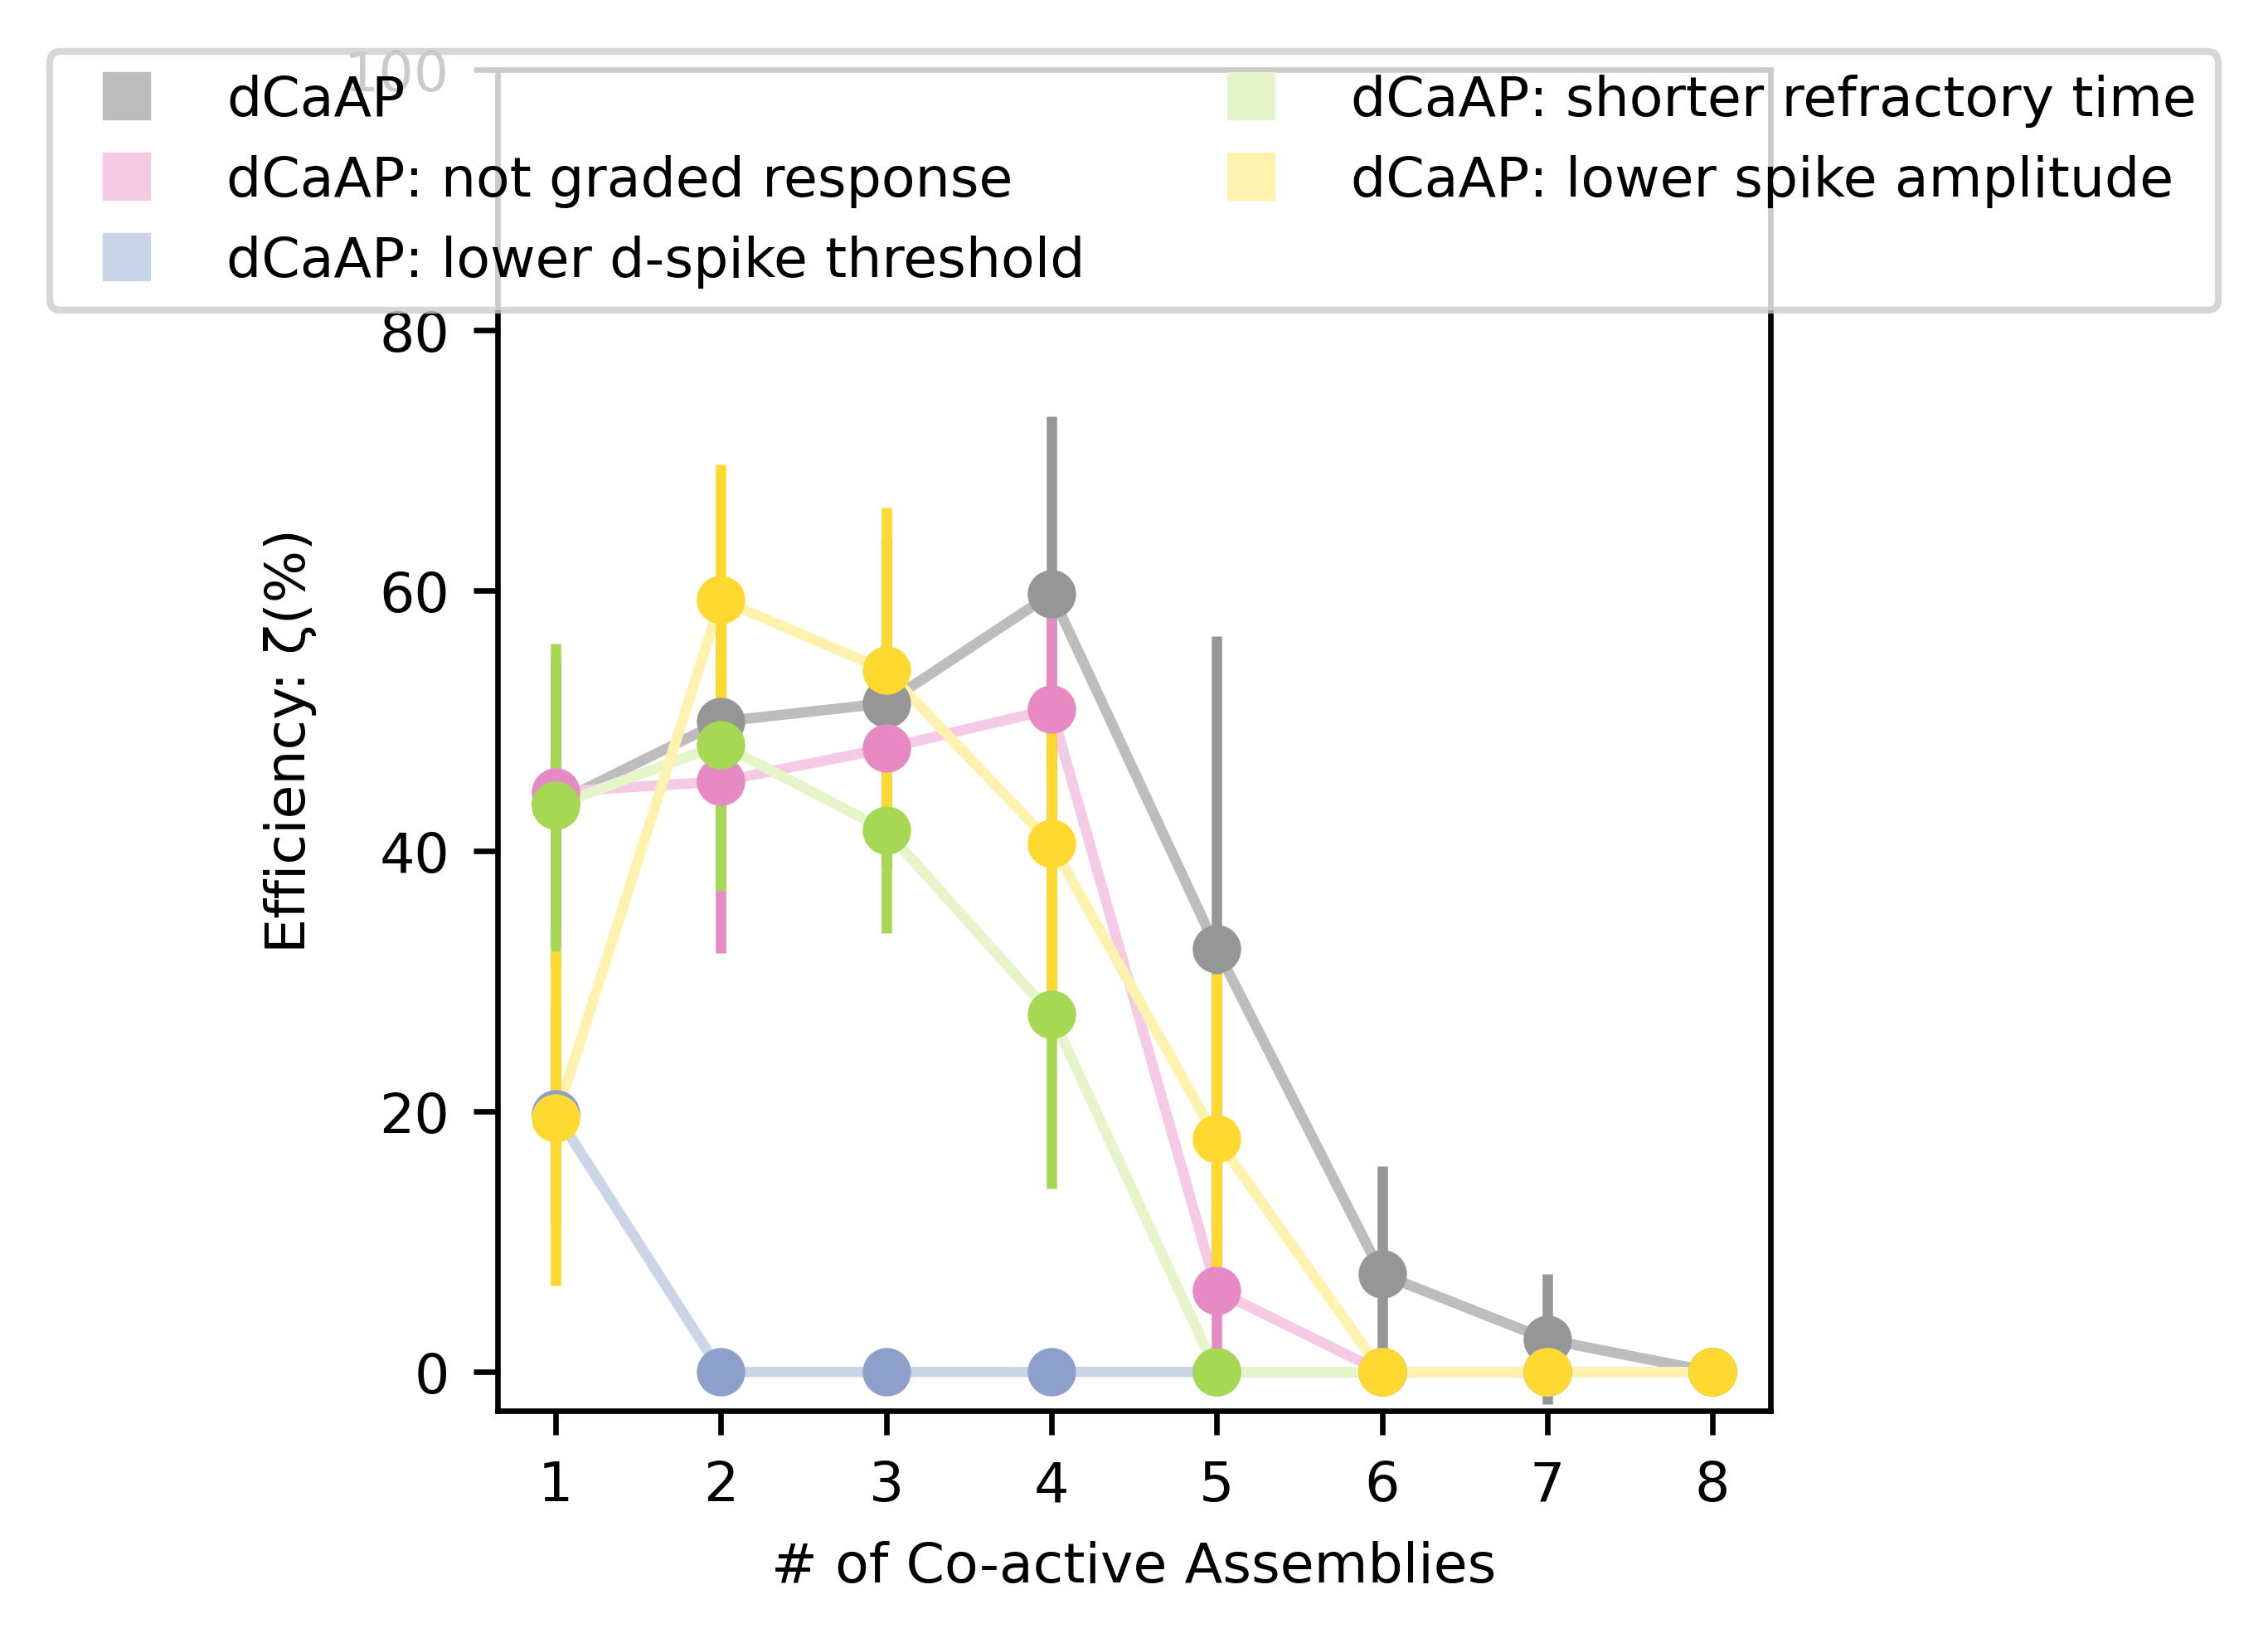

In [212]:
coactive = np.arange(1,9)


fig, ax = plt.subplots(figsize=(3.3, 3.5), dpi=600)
ax.set_ylim(-3,100)


ax.plot(coactive,EXP4_eff_gid,color=dCaAP_color2,label="dCaAP")
ax.errorbar(coactive, EXP4_eff_gid, yerr=EXP4_eff_gid_err, fmt="o", color=dCaAP_error_color2)

# ax.plot(coactive,EXP4_eff_limb,color=NMDA_color,label="NMDA")
# ax.errorbar(coactive, EXP4_eff_limb, yerr=EXP4_eff_limb_err, fmt="o", color=NMDA_error_color)

ax.plot(coactive,grade_EXP4_eff_gid,color=grade_color,label="not graded")
ax.errorbar(coactive, grade_EXP4_eff_gid, yerr=grade_EXP4_eff_gid_err, fmt="o", color=grade_error_color)

ax.plot(coactive,thr_EXP4_eff_gid,color=thr_color,label="threshold")
ax.errorbar(coactive, thr_EXP4_eff_gid, yerr=thr_EXP4_eff_gid_err, fmt="o", color=thr_error_color)

ax.plot(coactive,ref_EXP4_eff_gid,color=ref_color,label="refractory")
ax.errorbar(coactive, ref_EXP4_eff_gid, yerr=ref_EXP4_eff_gid_err, fmt="o", color=ref_error_color)

ax.plot(coactive,amp_EXP4_eff_gid,color=amp_color,label="amplitude")
ax.errorbar(coactive, amp_EXP4_eff_gid, yerr=amp_EXP4_eff_gid_err, fmt="o", color=amp_error_color)

ax.set_ylabel("Efficiency: \u03B6(%)")

ax.set_xlabel("# of Co-active Assemblies")
plt.xticks(range(1,9))
plt.yticks()


ax.legend(handles=[dCaAP_legend2,grade_legend,thr_legend,ref_legend,amp_legend],loc='lower center',bbox_to_anchor = (0.5,0.8), ncol = 2)

# Overlapping Assemblies

In [213]:
EXP5_dend_limb =[EXP2_dend[0]]
EXP5_dend_limb_err=[EXP2_dend_err[0]]
EXP5_assemb_limb = [EXP2_assemb[0]]
EXP5_assemb_limb_err=[EXP2_assemb_err[0]]
EXP5_eff_limb =[EXP2_eff[0]]
EXP5_eff_limb_err=[EXP2_eff_err[0]]
#####################
EXP5_dend_gid =[EXP2_dend[1]]
EXP5_dend_gid_err=[EXP2_dend_err[1]]
EXP5_assemb_gid = [EXP2_assemb[1]]
EXP5_assemb_gid_err=[EXP2_assemb_err[1]]
EXP5_eff_gid =[EXP2_eff[1]]
EXP5_eff_gid_err=[EXP2_eff_err[1]]
#################################################
exp_name = "rewiring_ex5"
exp_result_name_folder_list = ['overlap25','overlap50','overlap75']

for model_name in ['Limbacher','Gidon_dend']:
    for exp_result_name_folder in exp_result_name_folder_list:

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
        if '.DS_Store' in simulation_list_date:
            simulation_list_date.remove('.DS_Store')
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 38:
                        line_as_list = ast.literal_eval(line[29:])
#                         print(line_as_list)
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        if model_name == "Limbacher":
            EXP5_dend_limb.append(np.mean(sep_dend))
            EXP5_dend_limb_err.append(np.std(sep_dend))
            EXP5_assemb_limb.append(np.mean(sep_ass))
            EXP5_assemb_limb_err.append(np.std(sep_ass))
            EXP5_eff_limb.append(np.mean(eff))
            EXP5_eff_limb_err.append(np.std(eff))
        elif model_name == "Gidon_dend":
            EXP5_dend_gid.append(np.mean(sep_dend))
            EXP5_dend_gid_err.append(np.std(sep_dend))
            EXP5_assemb_gid.append(np.mean(sep_ass))
            EXP5_assemb_gid_err.append(np.std(sep_ass))
            EXP5_eff_gid.append(np.mean(eff))
            EXP5_eff_gid_err.append(np.std(eff))
            
            

## Number of Detected Assemblies

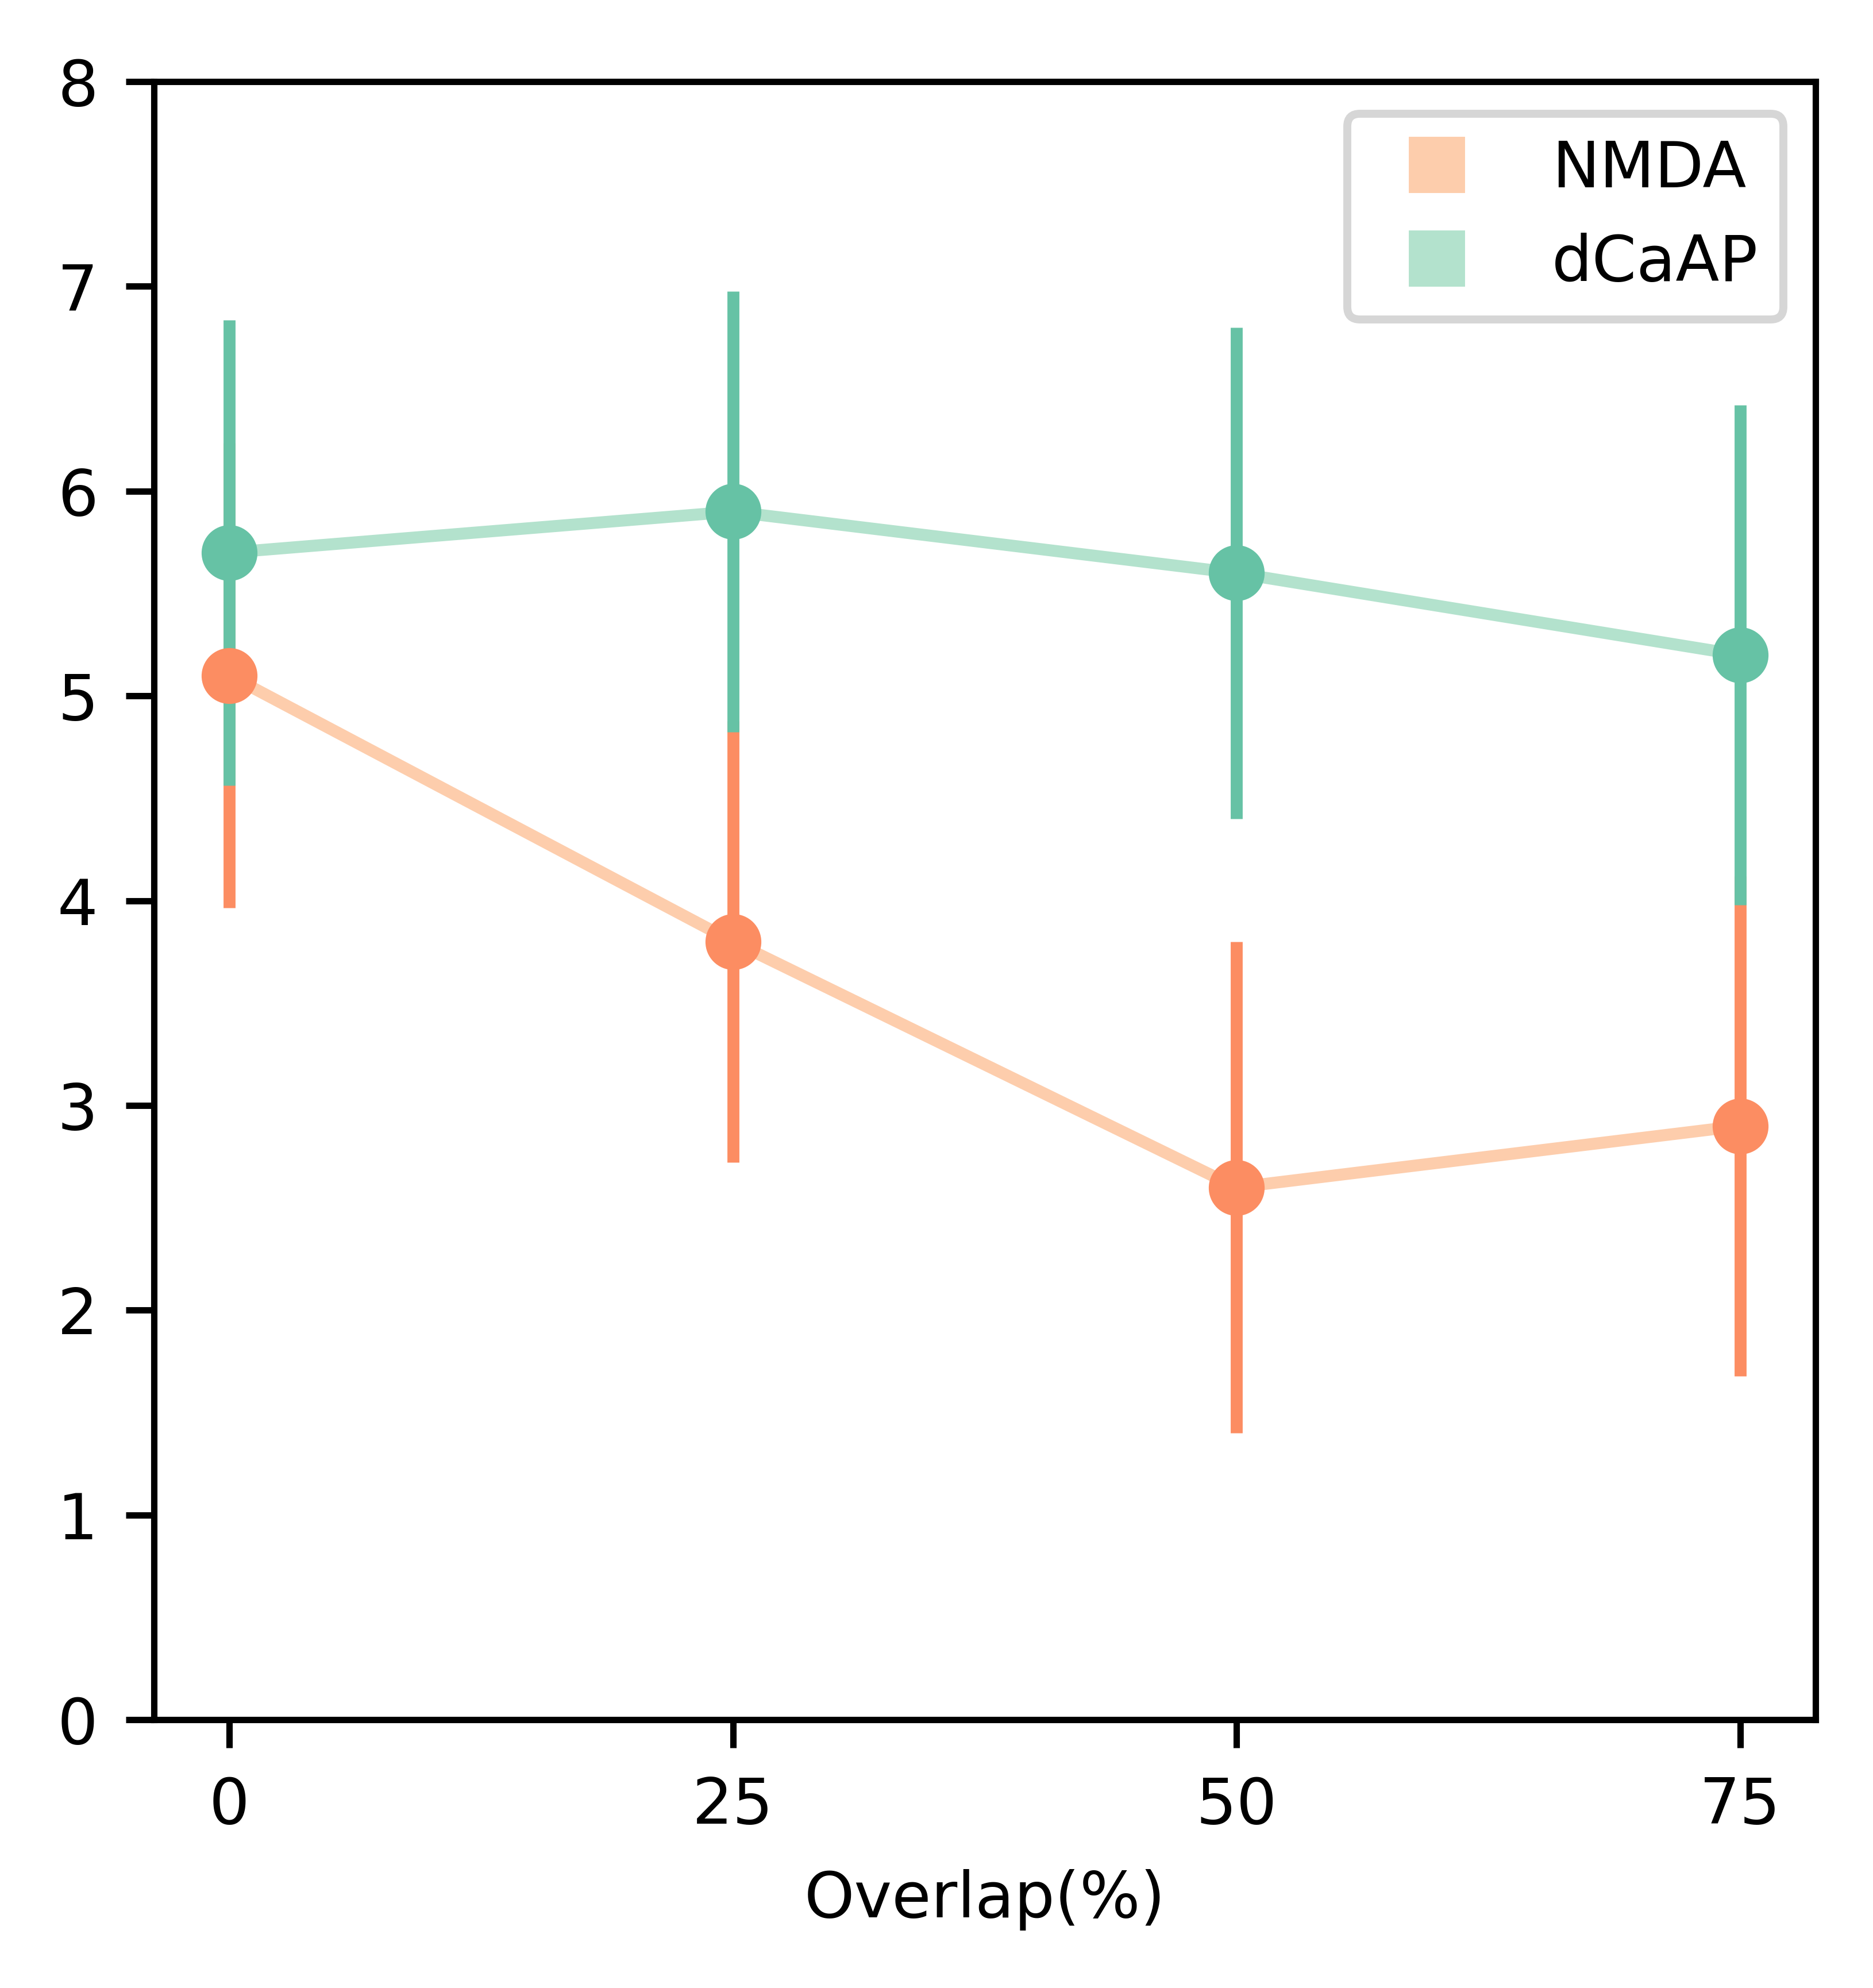

In [214]:
overlap_percentage = np.array([0,25,50,75])

fig, ax = plt.subplots(figsize=(3.3, 3.5), dpi=1000)
ax.set_ylim(0,101)


ax.plot(overlap_percentage,EXP5_assemb_limb,color=NMDA_color)
ax.errorbar(overlap_percentage, EXP5_assemb_limb, yerr=EXP5_assemb_limb_err, fmt="o", color=NMDA_error_color)

ax.plot(overlap_percentage,EXP5_assemb_gid,color=dCaAP_color)
ax.errorbar(overlap_percentage, EXP5_assemb_gid, yerr=EXP5_assemb_limb_err, fmt="o", color=dCaAP_error_color)




######### test plotting ############

# ax.plot(overlap_percentage[:len(EXP5_dend_test)],EXP5_dend_test,color='black',linestyle = '--',linewidth = 10 ,alpha=0.7,markersize = 20)
# ax.errorbar(overlap_percentage[:len(EXP5_dend_test)], EXP5_dend_test, yerr=EXP5_dend_err_test,capsize=10, fmt="o", color='black',markersize = 20,linewidth = 5)

# ax.plot(overlap_percentage[:len(EXP5_dend_test)],EXP5_assemb_test,color='black',linewidth = 10)
# ax.errorbar(overlap_percentage[:len(EXP5_dend_test)], EXP5_assemb_test, yerr=EXP5_assemb_err_test,capsize=10, fmt="o", color='black',markersize = 20,linewidth = 5)

####################################

ax.set_xlabel("Overlap(%)")
plt.xticks(overlap_percentage)
plt.yticks()
plt.ylim(0,8)


ax.legend(handles=[NMDA_legend,dCaAP_legend],loc='upper right')

plt.tight_layout()

fig.savefig("Figures/pdf/overlapping_detected_assemblies.pdf", format='pdf',bbox_inches='tight')
fig.savefig("Figures/svg/overlapping_detected_assemblies.svg", format='svg',bbox_inches='tight')

## Efficiency

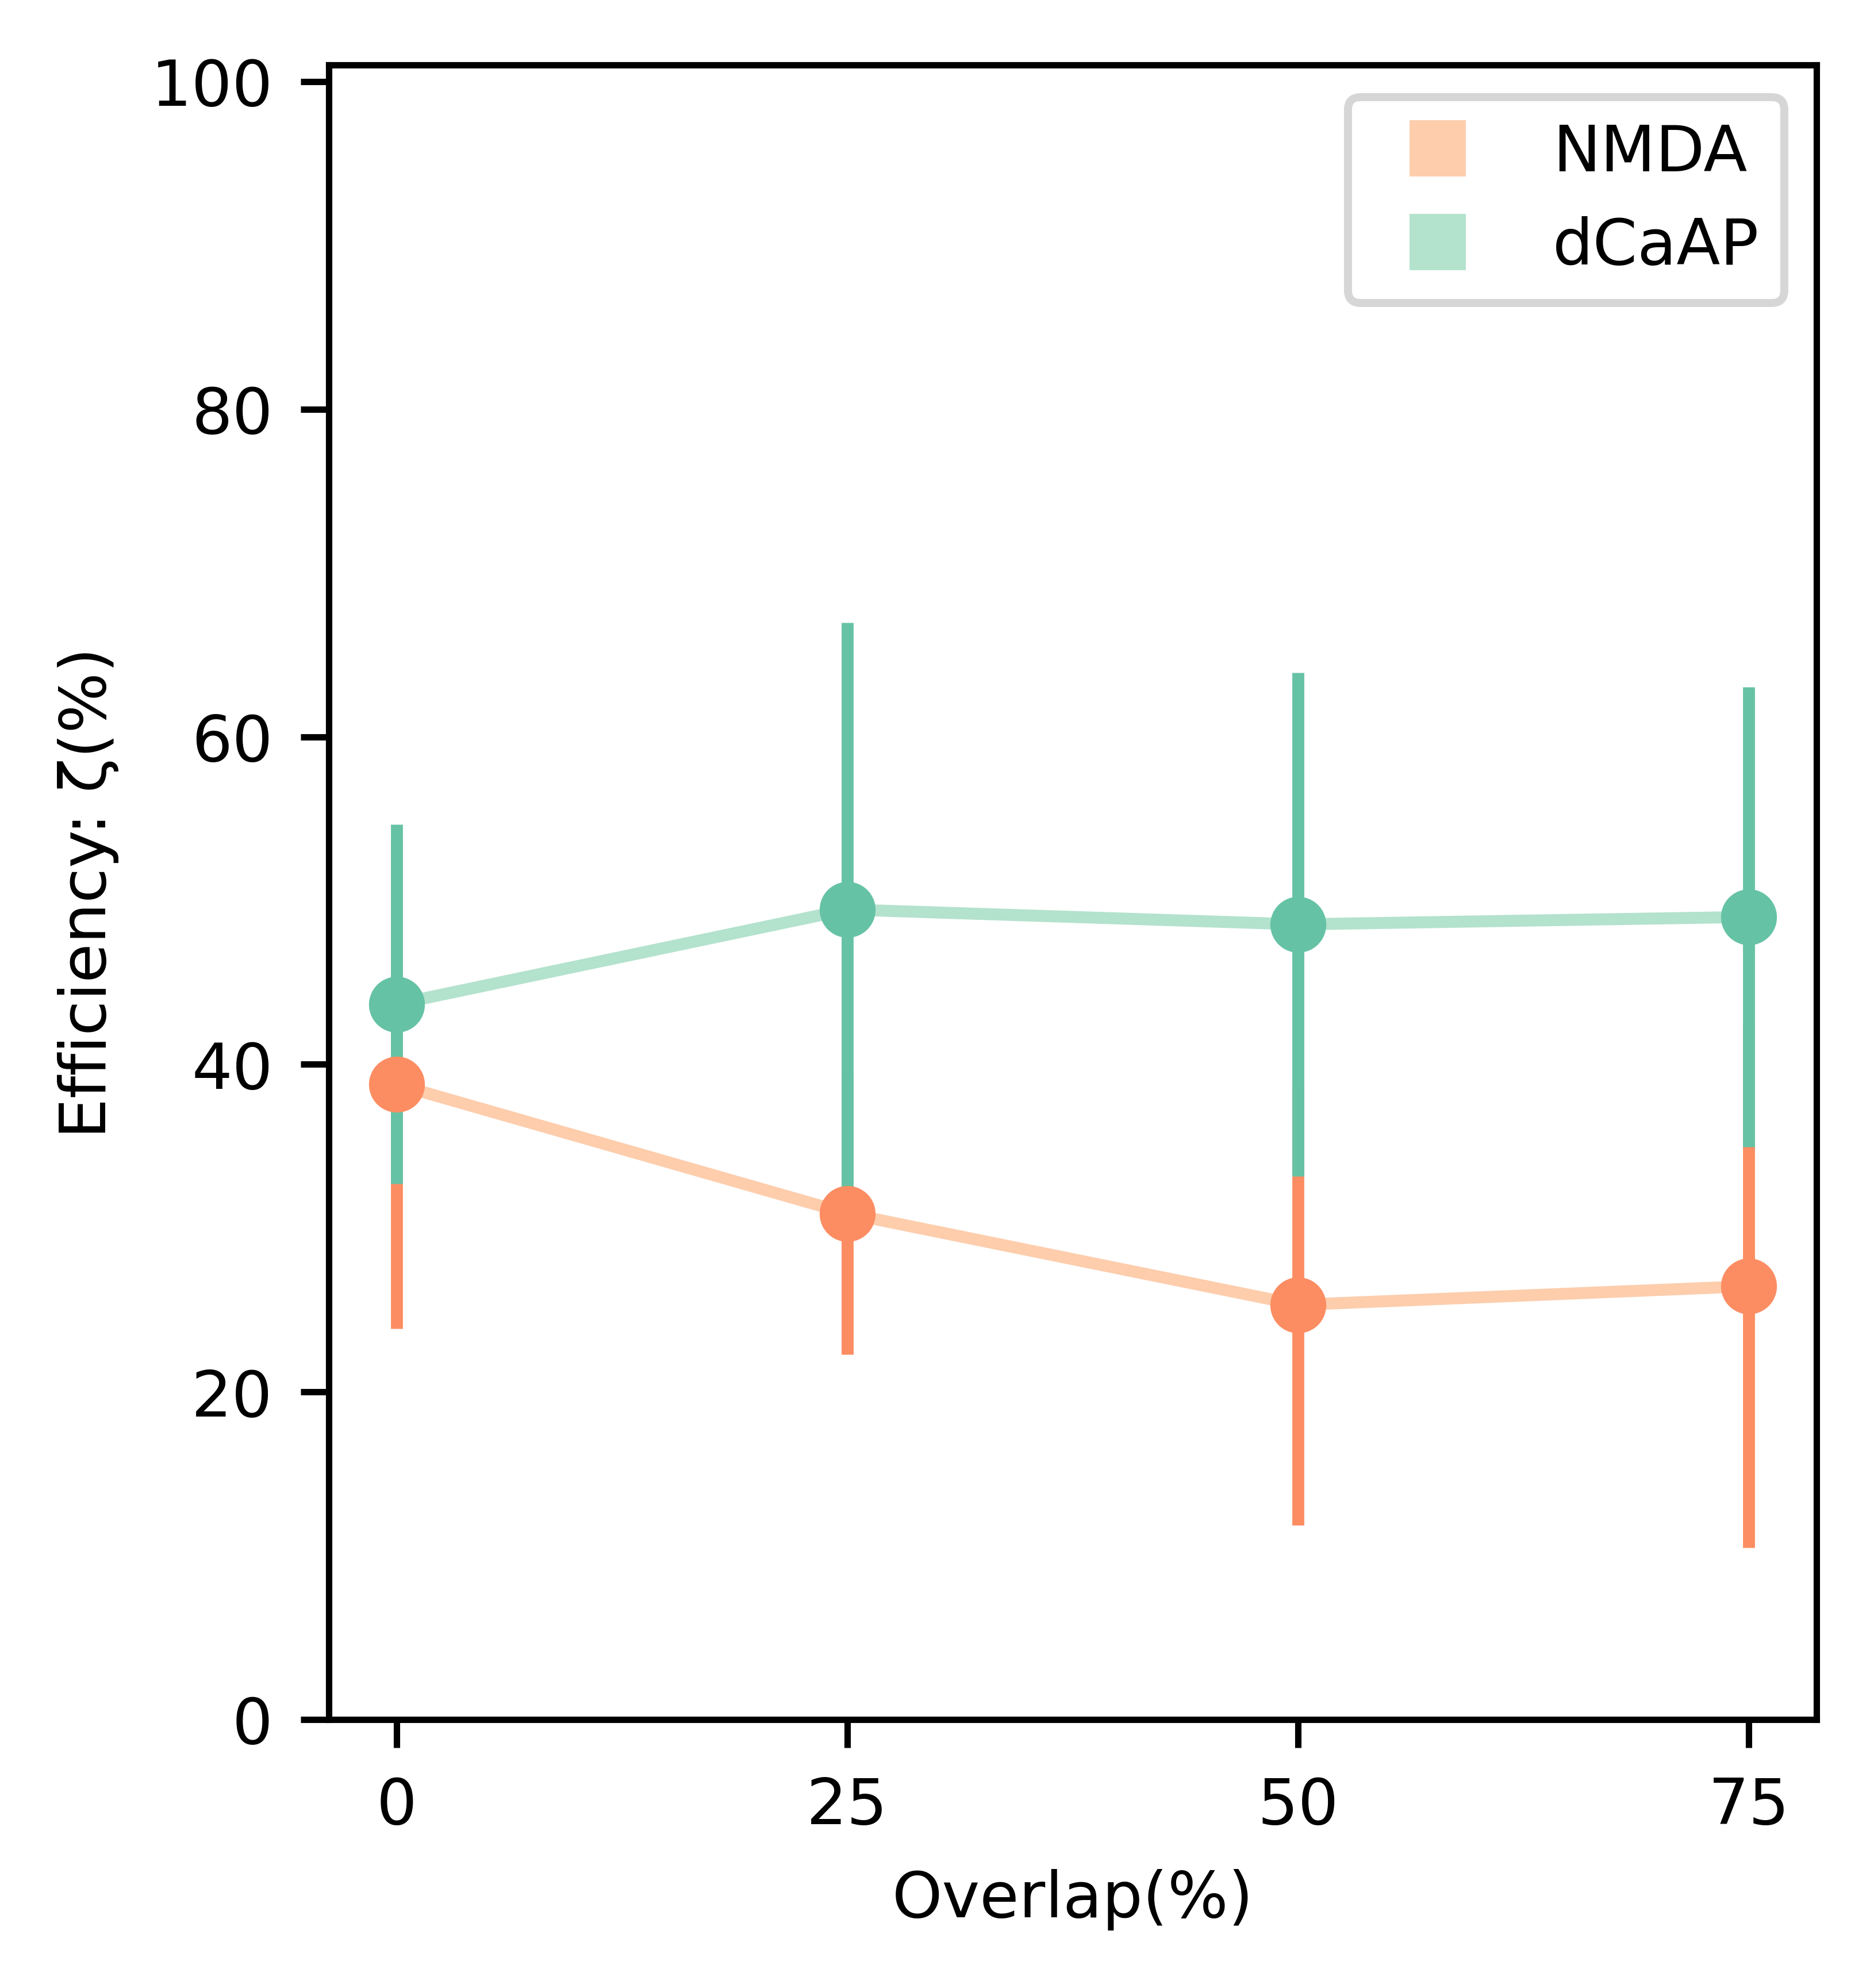

In [215]:
overlap_percentage = np.array([0,25,50,75])


fig, ax = plt.subplots(figsize=(3.3, 3.5), dpi=1000)
ax.set_ylim(0,101)


ax.plot(overlap_percentage,EXP5_eff_limb,color=NMDA_color,label="NMDA")
ax.errorbar(overlap_percentage, EXP5_eff_limb, yerr=EXP5_eff_limb_err, fmt="o", color=NMDA_error_color)

ax.plot(overlap_percentage[:len(EXP5_eff_gid)],EXP5_eff_gid,color=dCaAP_color,label="dCaAP")
ax.errorbar(overlap_percentage[:len(EXP5_eff_gid)], EXP5_eff_gid, yerr=EXP5_eff_gid_err, fmt="o", color=dCaAP_error_color)

##########test plotting
# ax.plot(overlap_percentage[:len(EXP5_eff_test)],EXP5_eff_test,color='black',label="Modified",alpha =0.7)
# ax.errorbar(overlap_percentage[:len(EXP5_eff_test)], EXP5_eff_test, yerr=EXP5_eff_test_err, fmt="", color='black',alpha=0.7)
###############

ax.set_ylabel("Efficiency: \u03B6(%)")
ax.set_xlabel("Overlap(%)")
plt.xticks(overlap_percentage)
plt.yticks()


ax.legend(handles=[NMDA_legend,dCaAP_legend],loc='upper right')

plt.tight_layout()
fig.savefig("Figures/pdf/overlapping_efficiencies.pdf", format='pdf',bbox_inches='tight')
fig.savefig("Figures/svg/overlapping_efficiencies.svg", format='svg',bbox_inches='tight')

## Results of the dCaAP model with constant dendritic spike amplitude (not graded)

In [216]:
grade_EXP5_dend_gid =[grade_EXP2_dend[0]]
grade_EXP5_dend_gid_err=[grade_EXP2_dend_err[0]]
grade_EXP5_assemb_gid = [grade_EXP2_assemb[0]]
grade_EXP5_assemb_gid_err=[grade_EXP2_assemb_err[0]]
grade_EXP5_eff_gid =[grade_EXP2_eff[0]]
grade_EXP5_eff_gid_err=[grade_EXP2_eff_err[0]]
#################################################
exp_name = "rewiring_ex5"
exp_result_name_folder_list = ['not_graded_overlap25','not_graded_overlap50','not_graded_overlap75']

for model_name in ['Gidon_dend']:
    for exp_result_name_folder in exp_result_name_folder_list:

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
        if '.DS_Store' in simulation_list_date:
            simulation_list_date.remove('.DS_Store')
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 38:
                        line_as_list = ast.literal_eval(line[29:])
#                         print(line_as_list)
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        if model_name == "Gidon_dend":
            grade_EXP5_dend_gid.append(np.mean(sep_dend))
            grade_EXP5_dend_gid_err.append(np.std(sep_dend))
            grade_EXP5_assemb_gid.append(np.mean(sep_ass))
            grade_EXP5_assemb_gid_err.append(np.std(sep_ass))
            grade_EXP5_eff_gid.append(np.mean(eff))
            grade_EXP5_eff_gid_err.append(np.std(eff))
            
            

## Results of the dCaAP model with lower Dendritic Threshold V_thr = -36 --> -55 mv

In [217]:
thr_EXP5_dend_gid =[thr_EXP2_dend[0]]
thr_EXP5_dend_gid_err=[thr_EXP2_dend_err[0]]
thr_EXP5_assemb_gid = [thr_EXP2_assemb[0]]
thr_EXP5_assemb_gid_err=[thr_EXP2_assemb_err[0]]
thr_EXP5_eff_gid =[thr_EXP2_eff[0]]
thr_EXP5_eff_gid_err=[thr_EXP2_eff_err[0]]
#################################################
exp_name = "rewiring_ex5"
exp_result_name_folder_list = ['thr_overlap25','thr_overlap50','thr_overlap75']

for model_name in ['Gidon_dend']:
    for exp_result_name_folder in exp_result_name_folder_list:

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
        if '.DS_Store' in simulation_list_date:
            simulation_list_date.remove('.DS_Store')
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 38:
                        line_as_list = ast.literal_eval(line[29:])
#                         print(line_as_list)
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        if model_name == "Gidon_dend":
            thr_EXP5_dend_gid.append(np.mean(sep_dend))
            thr_EXP5_dend_gid_err.append(np.std(sep_dend))
            thr_EXP5_assemb_gid.append(np.mean(sep_ass))
            thr_EXP5_assemb_gid_err.append(np.std(sep_ass))
            thr_EXP5_eff_gid.append(np.mean(eff))
            thr_EXP5_eff_gid_err.append(np.std(eff))
            
            

/var/folders/rj/mk57hg8s74l0y1xwws2ss9k40000gn/T/ipykernel_28088/1912265653.py:44: RuntimeWarning: invalid value encountered in divide
  eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)


## Results of the dCaAP model with shorter Dendritic refractory t_ref = 200 --> 50 ms

In [218]:
ref_EXP5_dend_gid =[ref_EXP2_dend[0]]
ref_EXP5_dend_gid_err=[ref_EXP2_dend_err[0]]
ref_EXP5_assemb_gid = [ref_EXP2_assemb[0]]
ref_EXP5_assemb_gid_err=[ref_EXP2_assemb_err[0]]
ref_EXP5_eff_gid =[ref_EXP2_eff[0]]
ref_EXP5_eff_gid_err=[ref_EXP2_eff_err[0]]
#################################################
exp_name = "rewiring_ex5"
exp_result_name_folder_list = ['ref_overlap25','ref_overlap50','ref_overlap75']

for model_name in ['Gidon_dend']:
    for exp_result_name_folder in exp_result_name_folder_list:

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
        if '.DS_Store' in simulation_list_date:
            simulation_list_date.remove('.DS_Store')
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 38:
                        line_as_list = ast.literal_eval(line[29:])
#                         print(line_as_list)
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        if model_name == "Gidon_dend":
            ref_EXP5_dend_gid.append(np.mean(sep_dend))
            ref_EXP5_dend_gid_err.append(np.std(sep_dend))
            ref_EXP5_assemb_gid.append(np.mean(sep_ass))
            ref_EXP5_assemb_gid_err.append(np.std(sep_ass))
            ref_EXP5_eff_gid.append(np.mean(eff))
            ref_EXP5_eff_gid_err.append(np.std(eff))
            
            

## Results of the dCaAP model with lower Dendritic spike amplitude

In [219]:
amp_EXP5_dend_gid =[amp_EXP2_dend[0]]
amp_EXP5_dend_gid_err=[amp_EXP2_dend_err[0]]
amp_EXP5_assemb_gid = [amp_EXP2_assemb[0]]
amp_EXP5_assemb_gid_err=[amp_EXP2_assemb_err[0]]
amp_EXP5_eff_gid =[amp_EXP2_eff[0]]
amp_EXP5_eff_gid_err=[amp_EXP2_eff_err[0]]
#################################################
exp_name = "rewiring_ex5"
exp_result_name_folder_list = ['amp_overlap25','amp_overlap50','amp_overlap75']

for model_name in ['Gidon_dend']:
    for exp_result_name_folder in exp_result_name_folder_list:

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
        if '.DS_Store' in simulation_list_date:
            simulation_list_date.remove('.DS_Store')
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 38:
                        line_as_list = ast.literal_eval(line[29:])
#                         print(line_as_list)
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        if model_name == "Gidon_dend":
            amp_EXP5_dend_gid.append(np.mean(sep_dend))
            amp_EXP5_dend_gid_err.append(np.std(sep_dend))
            amp_EXP5_assemb_gid.append(np.mean(sep_ass))
            amp_EXP5_assemb_gid_err.append(np.std(sep_ass))
            amp_EXP5_eff_gid.append(np.mean(eff))
            amp_EXP5_eff_gid_err.append(np.std(eff))
            
            

/var/folders/rj/mk57hg8s74l0y1xwws2ss9k40000gn/T/ipykernel_28088/1778513679.py:44: RuntimeWarning: invalid value encountered in divide
  eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)


## Plotting the resutls

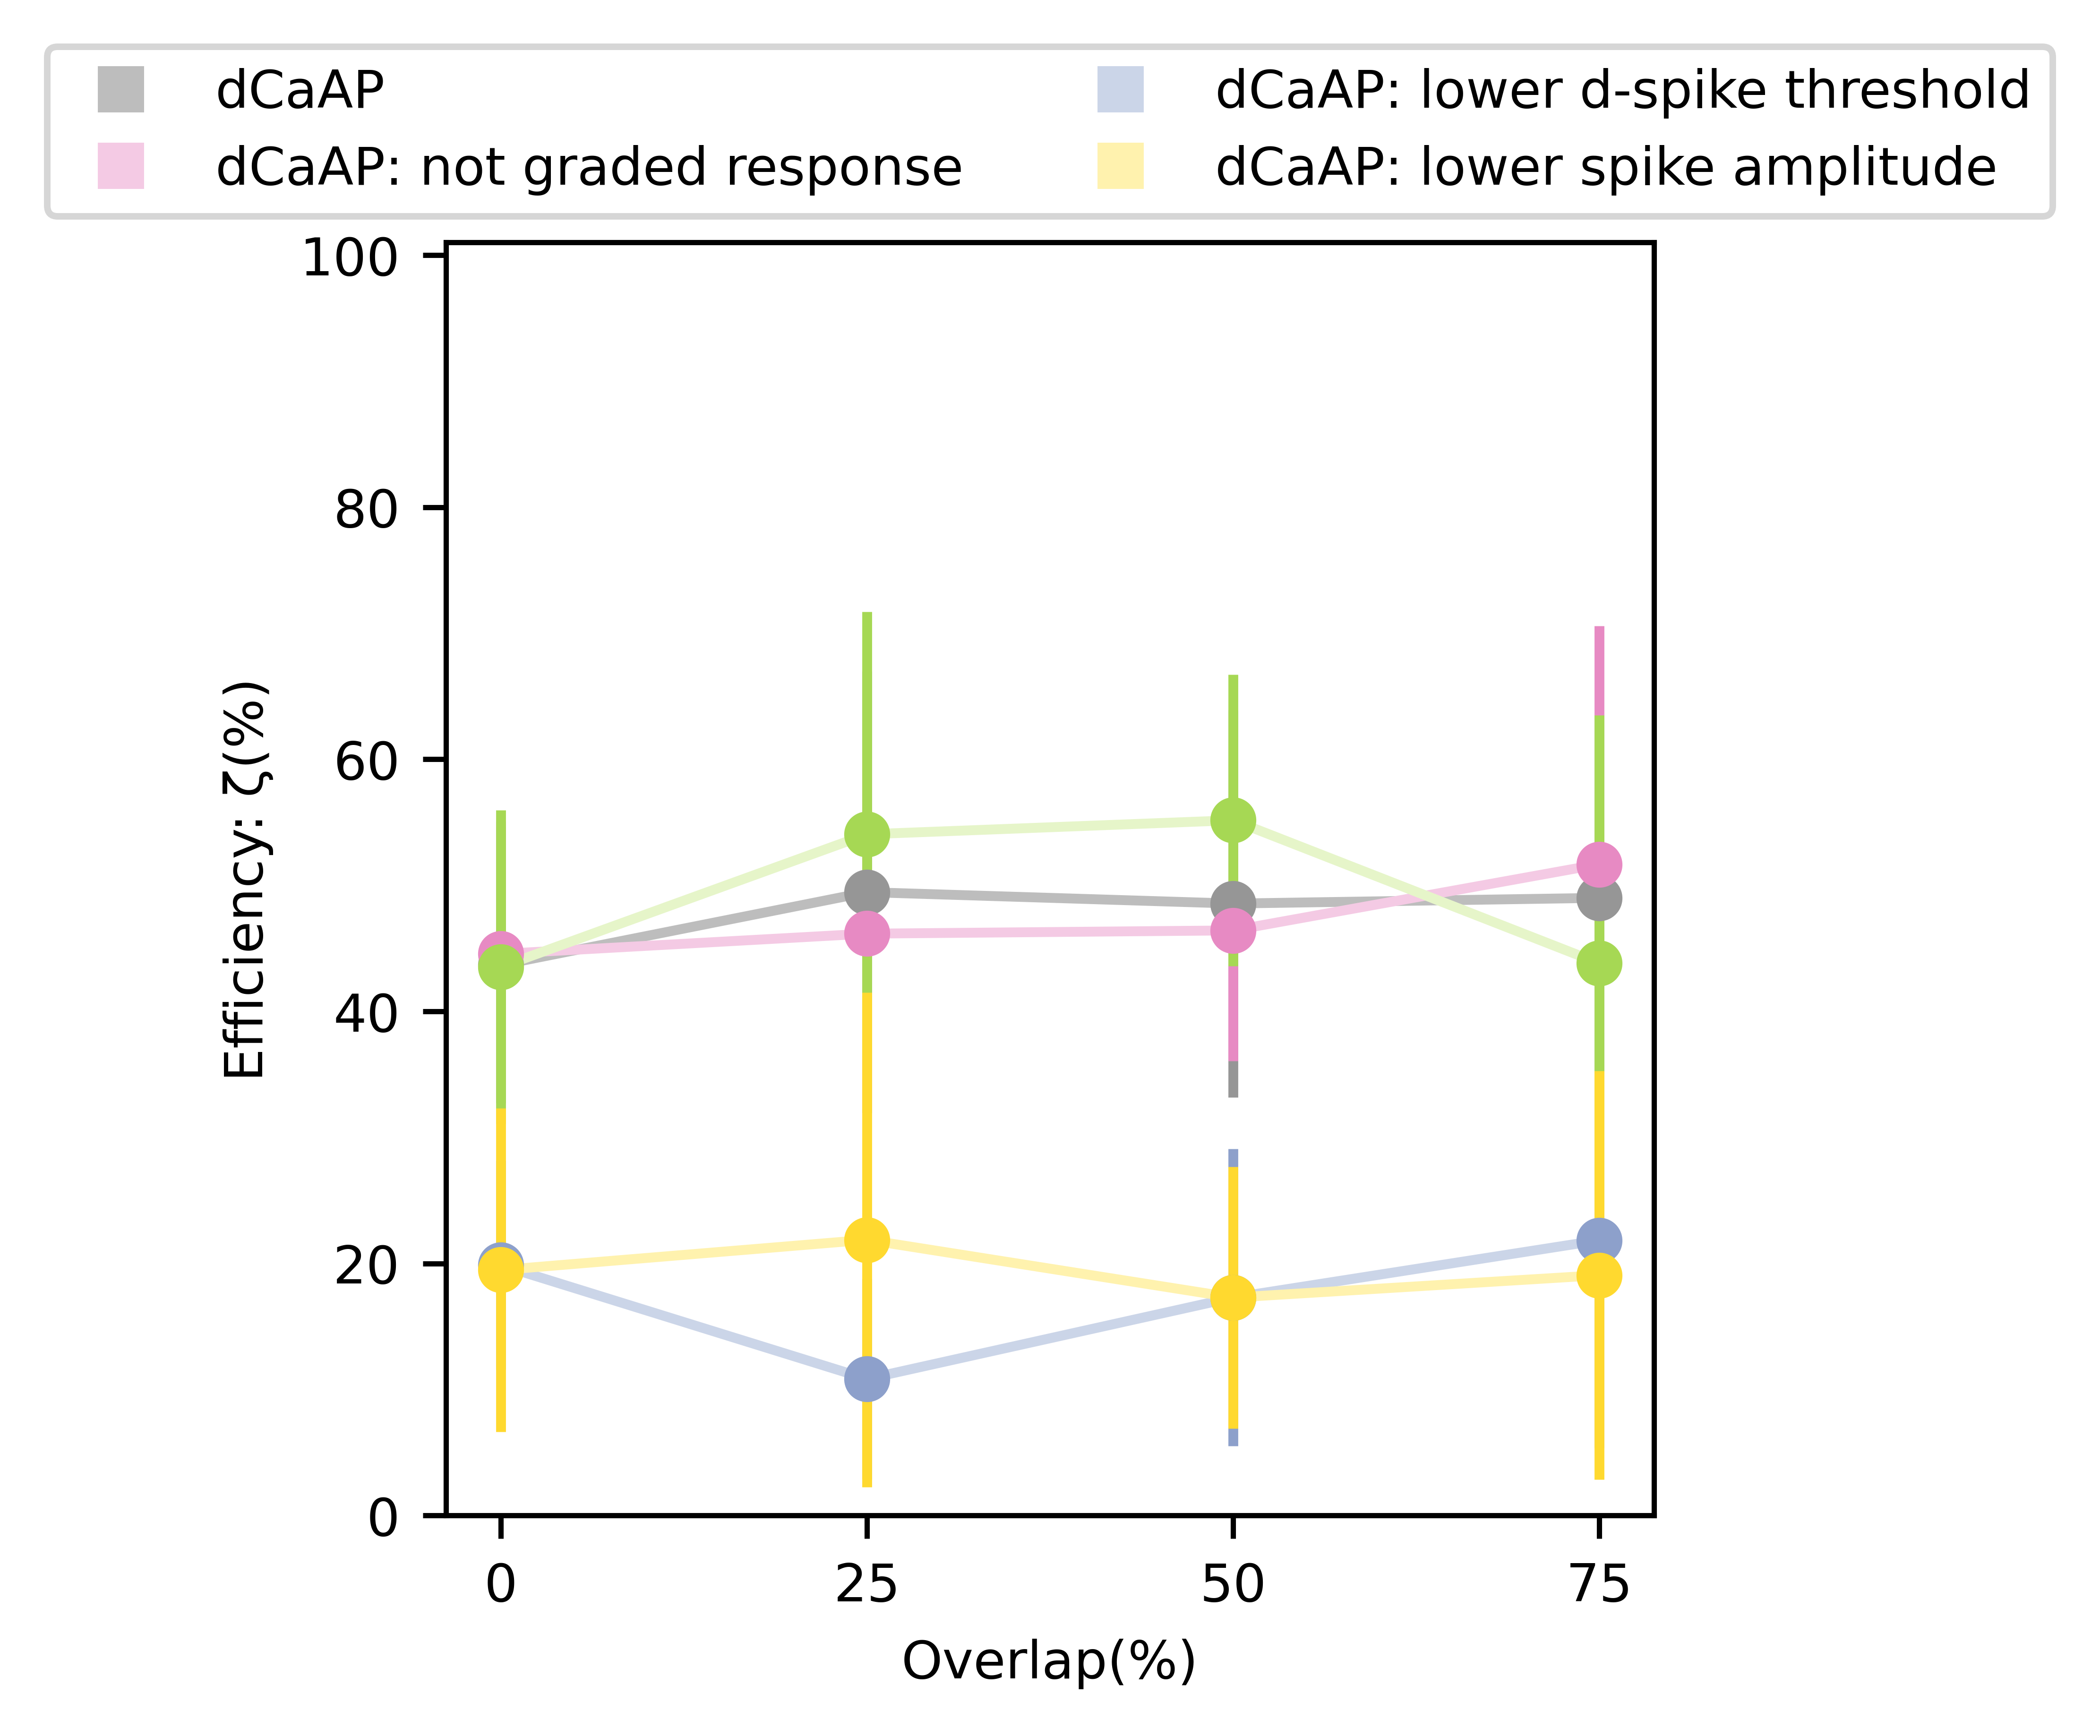

In [220]:
overlap_percentage = np.array([0,25,50,75])


fig, ax = plt.subplots(figsize=(3.3, 3.5), dpi=1000)
ax.set_ylim(0,101)


# ax.plot(overlap_percentage,EXP5_eff_limb,color=NMDA_color,label="NMDA")
# ax.errorbar(overlap_percentage, EXP5_eff_limb, yerr=EXP5_eff_limb_err, fmt="o", color=NMDA_error_color)

ax.plot(overlap_percentage,EXP5_eff_gid,color=dCaAP_color2,label="dCaAP")
ax.errorbar(overlap_percentage, EXP5_eff_gid, yerr=EXP5_eff_gid_err, fmt="o", color=dCaAP_error_color2)

ax.plot(overlap_percentage,grade_EXP5_eff_gid,color=grade_color,label="not graded")
ax.errorbar(overlap_percentage, grade_EXP5_eff_gid, yerr=grade_EXP5_eff_gid_err, fmt="o", color=grade_error_color)


ax.plot(overlap_percentage,thr_EXP5_eff_gid,color=thr_color,label="Threshold")
ax.errorbar(overlap_percentage, thr_EXP5_eff_gid, yerr=thr_EXP5_eff_gid_err, fmt="o", color=thr_error_color)

ax.plot(overlap_percentage,ref_EXP5_eff_gid,color=ref_color,label="refractory")
ax.errorbar(overlap_percentage, ref_EXP5_eff_gid, yerr=ref_EXP5_eff_gid_err, fmt="o", color=ref_error_color)


ax.plot(overlap_percentage,amp_EXP5_eff_gid,color=amp_color,label="amplitude")
ax.errorbar(overlap_percentage, amp_EXP5_eff_gid, yerr=amp_EXP5_eff_gid_err, fmt="o", color=amp_error_color)


ax.set_ylabel("Efficiency: \u03B6(%)")
ax.set_xlabel("Overlap(%)")
plt.xticks(overlap_percentage)
plt.yticks()

ax.legend(handles=[dCaAP_legend2,grade_legend,thr_legend,amp_legend],loc='lower center',bbox_to_anchor = (0.5,1.0), ncol = 2)

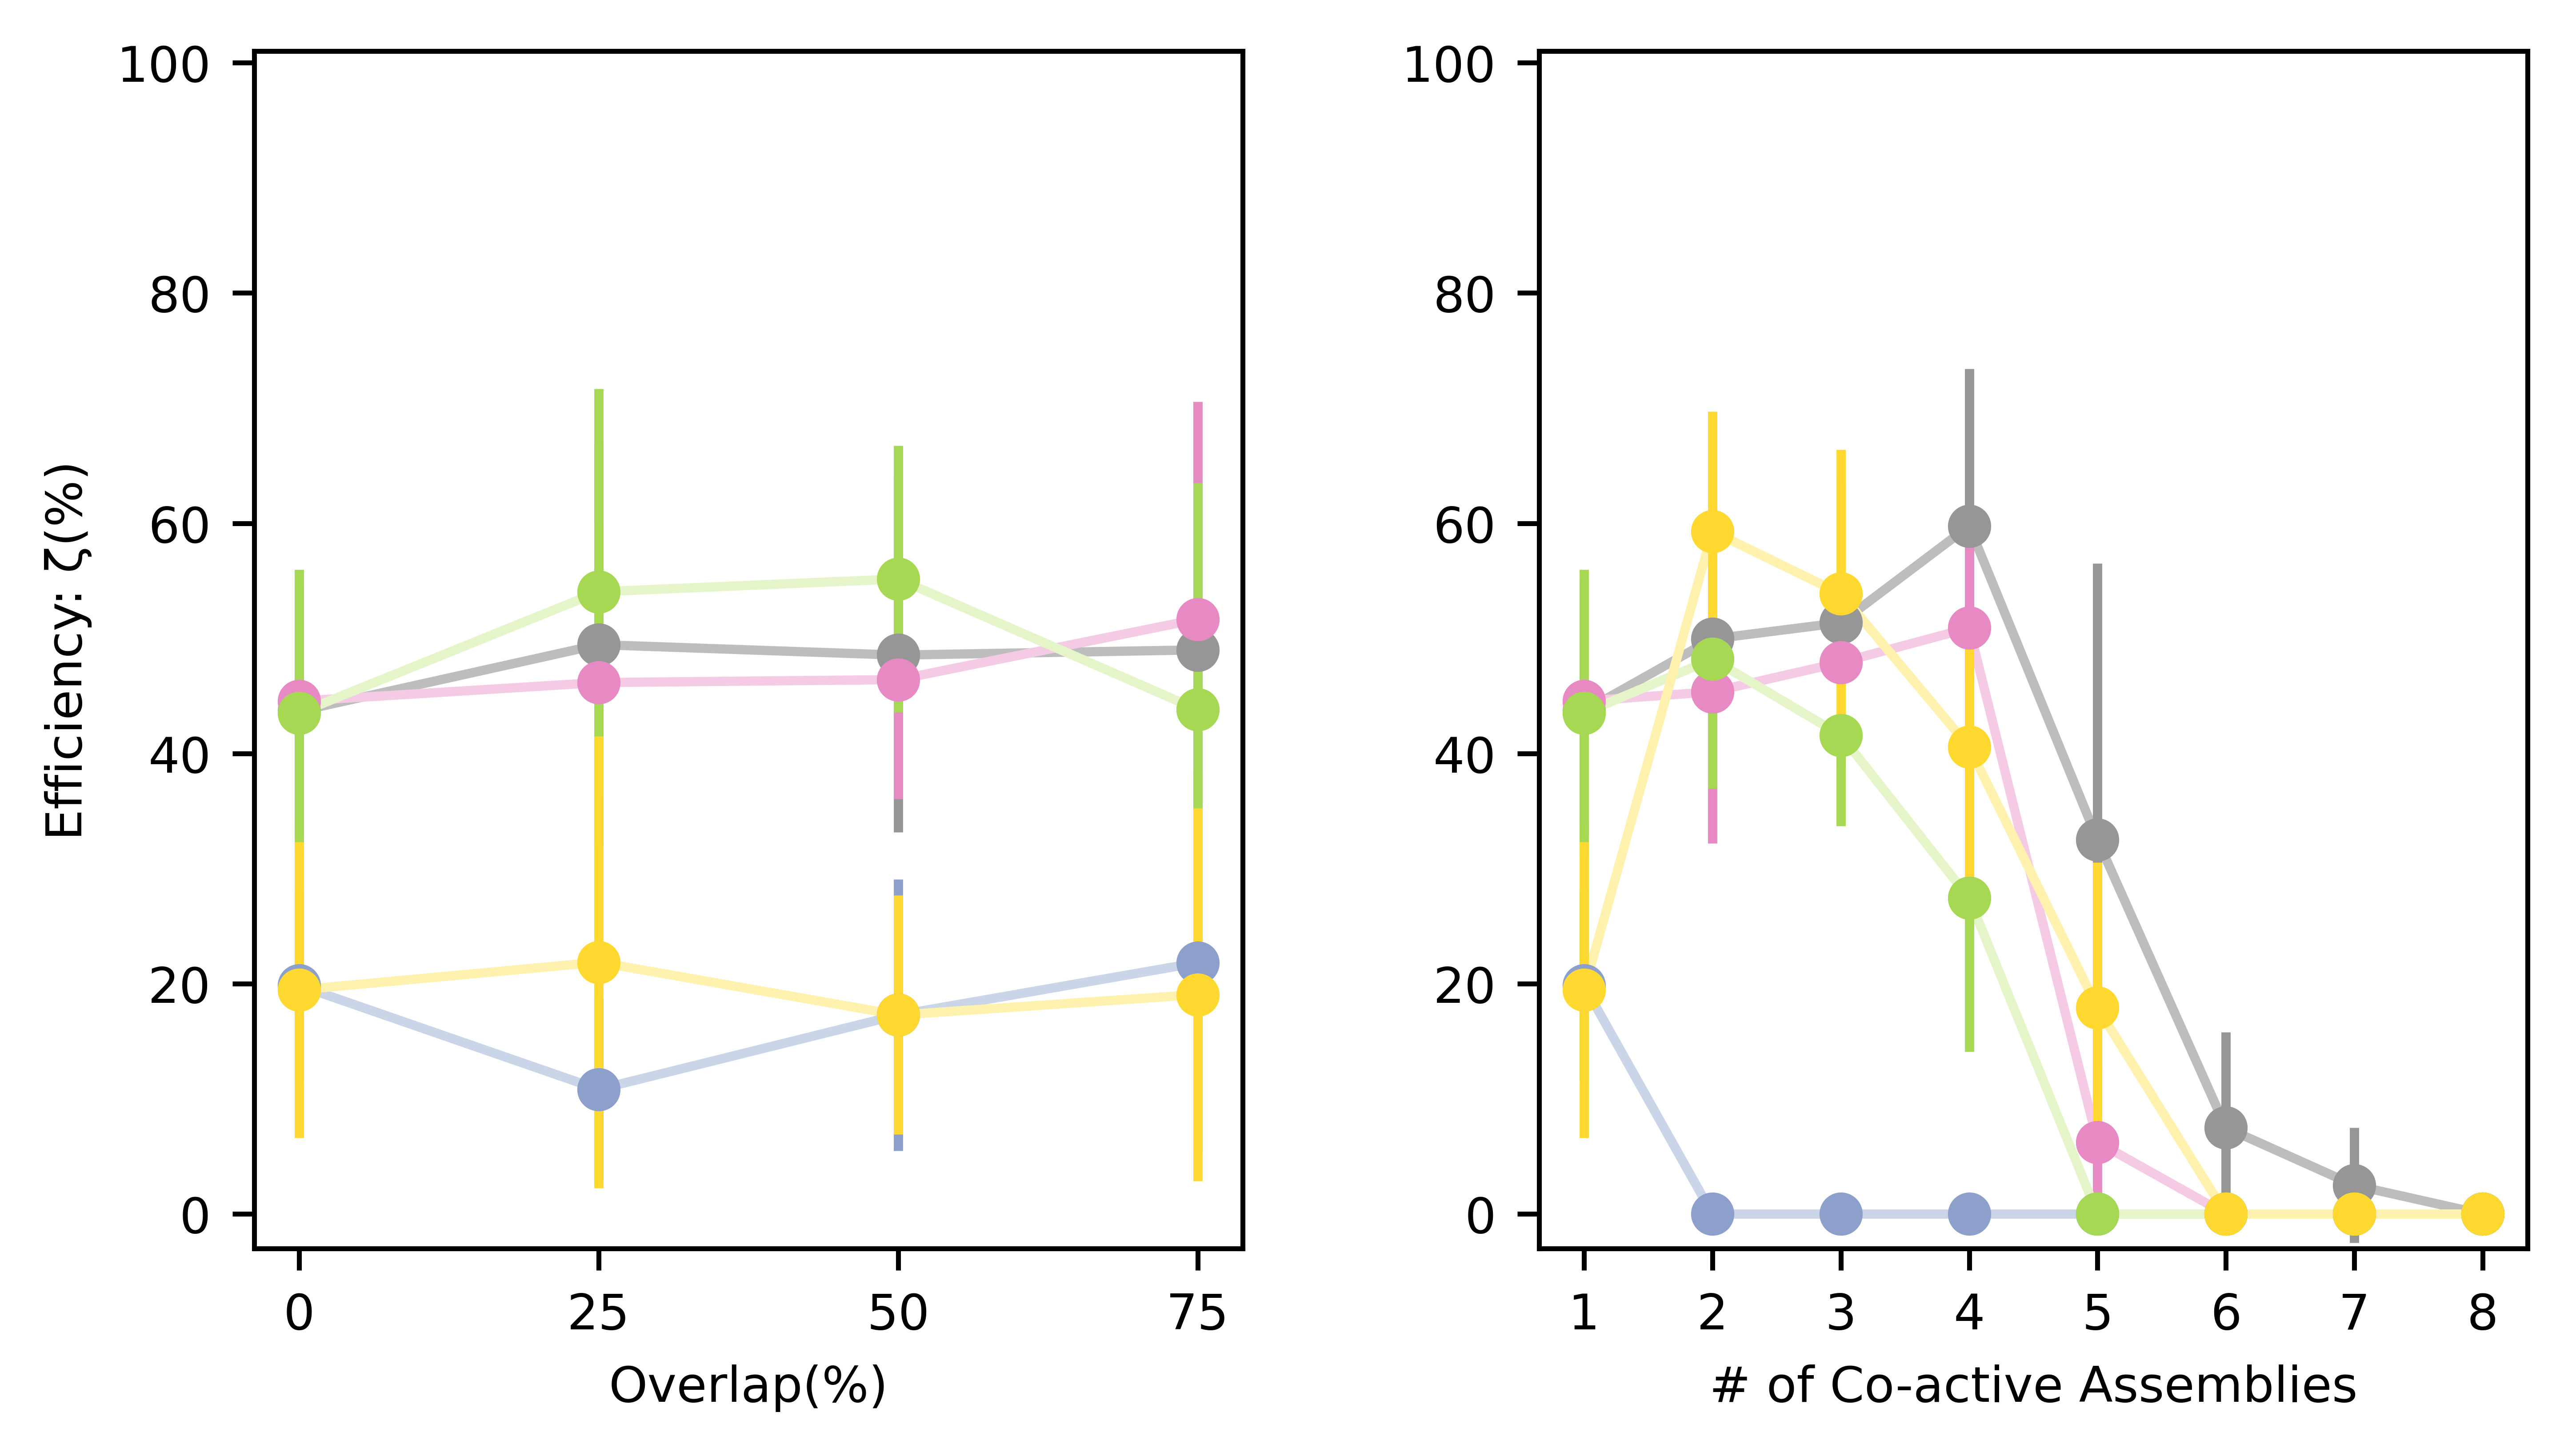

In [223]:
fig, ax = plt.subplots(1,2,figsize=(6.6, 3.5), dpi=1000)


coactive = np.arange(1,9)


ax[1].set_ylim(-3,101)


ax[1].plot(coactive,EXP4_eff_gid,color=dCaAP_color2,label="dCaAP")
ax[1].errorbar(coactive, EXP4_eff_gid, yerr=EXP4_eff_gid_err, fmt="o", color=dCaAP_error_color2)

# ax[0].plot(coactive,EXP4_eff_limb,color=NMDA_color,label="NMDA")
# ax[0].errorbar(coactive, EXP4_eff_limb, yerr=EXP4_eff_limb_err, fmt="o", color=NMDA_error_color)

ax[1].plot(coactive,grade_EXP4_eff_gid,color=grade_color,label="not graded")
ax[1].errorbar(coactive, grade_EXP4_eff_gid, yerr=grade_EXP4_eff_gid_err, fmt="o", color=grade_error_color)

ax[1].plot(coactive,thr_EXP4_eff_gid,color=thr_color,label="threshold")
ax[1].errorbar(coactive, thr_EXP4_eff_gid, yerr=thr_EXP4_eff_gid_err, fmt="o", color=thr_error_color)

ax[1].plot(coactive,ref_EXP4_eff_gid,color=ref_color,label="refractory")
ax[1].errorbar(coactive, ref_EXP4_eff_gid, yerr=ref_EXP4_eff_gid_err, fmt="o", color=ref_error_color)

ax[1].plot(coactive,amp_EXP4_eff_gid,color=amp_color,label="amplitude")
ax[1].errorbar(coactive, amp_EXP4_eff_gid, yerr=amp_EXP4_eff_gid_err, fmt="o", color=amp_error_color)

ax[0].set_ylabel("Efficiency: \u03B6(%)")

ax[1].set_xlabel("# of Co-active Assemblies")
ax[1].set_xticks(range(1,9))
ax[1].set_yticks(np.arange(0,101,20))


# ax.legend(handles=[NMDA_legend,dCaAP_legend,grade_legend,thr_legend,ref_legend,amp_legend],loc='lower center',bbox_to_anchor = (0.5,0.8), ncol = 2)
############### Overlapping ################
overlap_percentage = np.array([0,25,50,75])
ax[0].set_ylim(-3,101)


# ax[1].plot(overlap_percentage,EXP5_eff_limb,color=NMDA_color,label="NMDA")
# ax[1].errorbar(overlap_percentage, EXP5_eff_limb, yerr=EXP5_eff_limb_err, fmt="o", color=NMDA_error_color)



ax[0].plot(overlap_percentage,EXP5_eff_gid,color=dCaAP_color2,label="dCaAP")
ax[0].errorbar(overlap_percentage, EXP5_eff_gid, yerr=EXP5_eff_gid_err, fmt="o", color=dCaAP_error_color2)

ax[0].plot(overlap_percentage,grade_EXP5_eff_gid,color=grade_color,label="not graded")
ax[0].errorbar(overlap_percentage, grade_EXP5_eff_gid, yerr=grade_EXP5_eff_gid_err, fmt="o", color=grade_error_color)


ax[0].plot(overlap_percentage,thr_EXP5_eff_gid,color=thr_color,label="Threshold")
ax[0].errorbar(overlap_percentage, thr_EXP5_eff_gid, yerr=thr_EXP5_eff_gid_err, fmt="o", color=thr_error_color)

ax[0].plot(overlap_percentage,ref_EXP5_eff_gid,color=ref_color,label="refractory")
ax[0].errorbar(overlap_percentage, ref_EXP5_eff_gid, yerr=ref_EXP5_eff_gid_err, fmt="o", color=ref_error_color)


ax[0].plot(overlap_percentage,amp_EXP5_eff_gid,color=amp_color,label="amplitude")
ax[0].errorbar(overlap_percentage, amp_EXP5_eff_gid, yerr=amp_EXP5_eff_gid_err, fmt="o", color=amp_error_color)


# ax[1].set_ylabel("Efficiency: \u03B6(%)")
ax[0].set_xlabel("Overlap(%)")
ax[0].set_xticks(overlap_percentage)
ax[0].set_yticks(np.arange(0,101,20))


plt.subplots_adjust(wspace = 0.3)
# fig.legend(handles=[NMDA_legend,dCaAP_legend,grade_legend,thr_legend,amp_legend],loc='lower center',bbox_to_anchor = (0.5,0.8), ncol = 2)

fig.savefig("Figures/pdf/changed_overlapp_coactive.pdf", format='pdf',bbox_inches='tight')
fig.savefig("Figures/svg/changed_overlapp_coactive.svg", format='svg',bbox_inches='tight')

# Input current Intensity

In [3]:
EXP6_dend_limb =[]
EXP6_dend_limb_err=[]
EXP6_assemb_limb = []
EXP6_assemb_limb_err=[]
EXP6_eff_limb =[]
EXP6_eff_limb_err=[]
#####################
EXP6_dend_gid =[]
EXP6_dend_gid_err=[]
EXP6_assemb_gid = []
EXP6_assemb_gid_err=[]
EXP6_eff_gid = []
EXP6_eff_gid_err=[]
#################################################
exp_name = "rewiring_ex2"
exp_result_name_folder_list = ['Random_input_I_amp1.0','Random_input','Random_input_I_amp5.0','Random_input_I_amp7.0','Random_input_I_amp9.0']

for model_name in ['Limbacher','Gidon_dend']:
    for exp_result_name_folder in exp_result_name_folder_list:

        simulation_list_date = os.listdir(f'results/{exp_name}/{exp_result_name_folder}/{model_name}')
        if '.ipynb_checkpoints' in simulation_list_date:
            simulation_list_date.remove('.ipynb_checkpoints') 
        if '.DS_Store' in simulation_list_date:
            simulation_list_date.remove('.DS_Store')
        simulation_list_date.sort()

        sep_ass = []
        sep_dend = []

        for i in range(len(simulation_list_date)):
            u = 0
            dend_counter = 0
            assemb_list = []
            color_of_seperated_assemblies = []
            with open(f'results/{exp_name}/{exp_result_name_folder}/{model_name}/{simulation_list_date[i]}/stats.txt', 'r') as f:
                for line in f:
                    if u == 26:
                        line_as_list = ast.literal_eval(line[29:])
                        for DEND in line_as_list:
                            if len(DEND) == 1:
                                dend_counter += 1
                                assemb_list.append(DEND[0])
                        sep_dend.append(dend_counter)
                    u += 1

            sep_ass.append(len(set(assemb_list)))
        sep_ass = np.array(sep_ass)
        sep_dend = np.array(sep_dend)
        eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)
        if model_name == "Limbacher":
            EXP6_dend_limb.append(np.mean(sep_dend))
            EXP6_dend_limb_err.append(np.std(sep_dend))
            EXP6_assemb_limb.append(np.mean(sep_ass))
            EXP6_assemb_limb_err.append(np.std(sep_ass))
            EXP6_eff_limb.append(np.mean(eff))
            EXP6_eff_limb_err.append(np.std(eff))
        elif model_name == "Gidon_dend":
            EXP6_dend_gid.append(np.mean(sep_dend))
            EXP6_dend_gid_err.append(np.std(sep_dend))
            EXP6_assemb_gid.append(np.mean(sep_ass))
            EXP6_assemb_gid_err.append(np.std(sep_ass))
            EXP6_eff_gid.append(np.mean(eff))
            EXP6_eff_gid_err.append(np.std(eff))


/var/folders/rj/mk57hg8s74l0y1xwws2ss9k40000gn/T/ipykernel_28088/3503570475.py:50: RuntimeWarning: invalid value encountered in divide
  eff = np.nan_to_num(((sep_ass/8)*(sep_ass/sep_dend))*100)


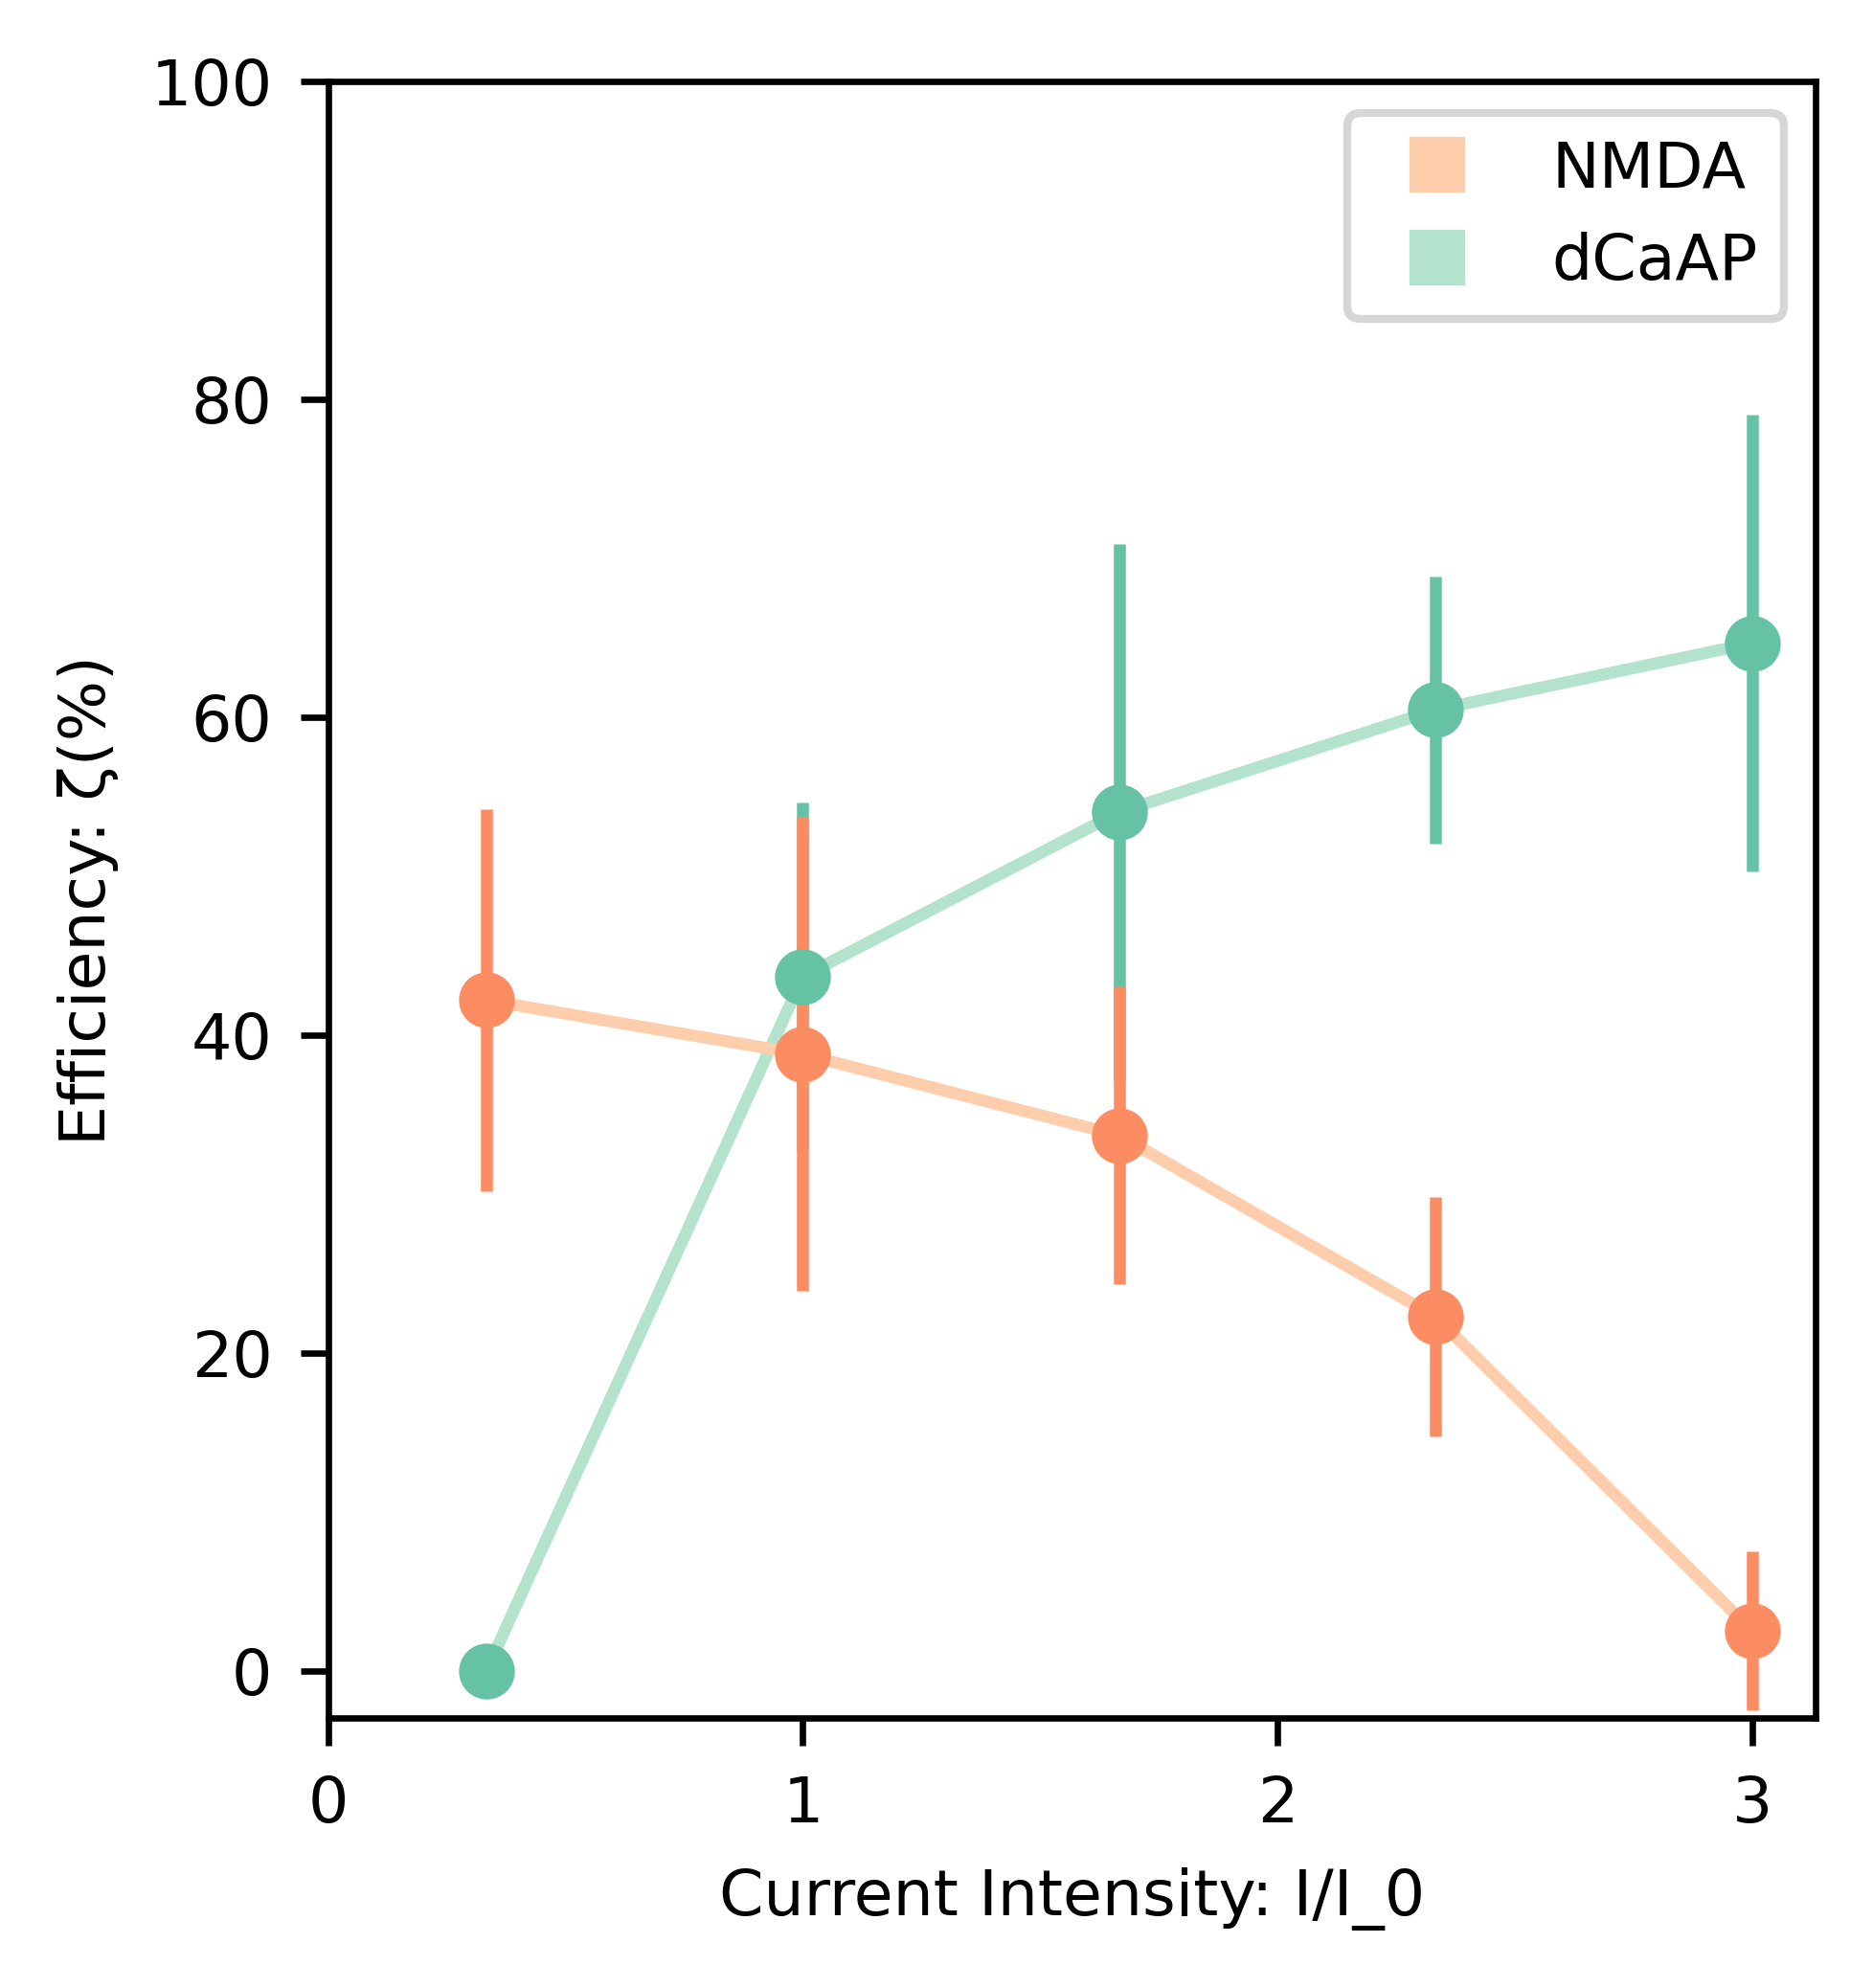

In [7]:
Intensity = [1/3,3/3,5/3,7/3,9/3]


fig, ax = plt.subplots(figsize=(3.3, 3.5), dpi=600)
ax.set_ylim(-3,100)


ax.plot(Intensity,EXP6_eff_gid,color=dCaAP_color,label="dCaAP")
ax.errorbar(Intensity, EXP6_eff_gid, yerr=EXP6_eff_gid_err, fmt="o", color=dCaAP_error_color)

ax.plot(Intensity,EXP6_eff_limb,color=NMDA_color,label="NMDA")
ax.errorbar(Intensity, EXP6_eff_limb, yerr=EXP6_eff_limb_err, fmt="o", color=NMDA_error_color)


ax.set_ylabel("Efficiency: \u03B6(%)")

ax.set_xlabel("Current Intensity: I/I_0")
plt.xticks([0,1,2,3])
plt.yticks()

dCaAP_legend = mlines.Line2D([], [], color=dCaAP_color, marker='s', linestyle='None',
                           label='dCaAP')
NMDA_legend = mlines.Line2D([], [], color=NMDA_color, marker='s', linestyle='None',
                           label='NMDA')

ax.legend(handles=[NMDA_legend,dCaAP_legend],loc='upper right')

plt.tight_layout()
# plt.show()
fig.savefig("Figures/pdf/Intensity_efficiencies.pdf", format='pdf',bbox_inches='tight')
fig.savefig("Figures/svg/Intensity_efficiencies.svg", format='svg',bbox_inches='tight')